In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import math

import plotly.express as px
import squarify
import dtale
import sweetviz as sv

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

The dataset consists of details of numerous callers located in different parts of India. For each caller, different attributes
like the network service provider, the network technology (4G or 3G) that the caller was using,
in-out mode he/she was in that is whether he/she was traveling or not, what rating he/she gave
to the call, etc. were collected.

1. Index - Row Number
2. Operator - The network operator name
3. In Out Travelling - The kind of network used - Indoor, Outdoor, or Travelling
4. Network Type - 2G, 3G, 4G, etc
5. Rating
6. Call Drop Category
7. Latitude
8. Longitude
9. State Name
10. Average Data Speed Download
11. Average Signal Strength Download
12. Average Data Speed Upload
13. Average Signal Strength Upload
14. Population - Population of the state
15. Literacy Rate - Literacy rate of the state
16. Rainfall - Rainfall in the state
17. Area of the State

In [3]:
Dataset = pd.read_csv("Project6_data.csv")

In [4]:
Dataset.head(10)

,Unnamed: 0,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.860,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.960,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.030,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.390,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
5,5,Airtel,Travelling,4G,3,Satisfactory,18.546627,73.819532,Maharashtra,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
6,6,Airtel,Travelling,4G,5,Satisfactory,18.547528,73.819105,Maharashtra,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
7,7,Airtel,Travelling,4G,4,Satisfactory,18.547528,73.819105,Maharashtra,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
8,8,Airtel,Indoor,4G,5,Satisfactory,10.583104,77.263595,Tamil Nadu,7914.680,-95.011,2788.90,-95.093,72147030.0,80.33,998.0,130060.0
9,9,RJio,Indoor,4G,5,Satisfactory,29.672815,77.007663,Haryana,7170.630,-94.578,2680.02,-94.650,25351462.0,75.55,617.0,44212.0


The column named unnamed is nothing but just index & I think we don't need that, so I'll drop it.

In [5]:
Dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
Dataset.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [7]:
Dataset.shape

(30785, 16)

In [8]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30785 entries, 0 to 30784
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Operator                          30785 non-null  object 
 1   In Out Travelling                 30785 non-null  object 
 2   Network Type                      30785 non-null  object 
 3   Rating                            30785 non-null  int64  
 4   Call Drop Category                30785 non-null  object 
 5   Latitude                          30785 non-null  float64
 6   Longitude                         30785 non-null  float64
 7   State Name                        30785 non-null  object 
 8   Average Data Speed Download       30785 non-null  float64
 9   Average Signal Strength Download  30785 non-null  float64
 10  Average Data Speed Upload         30785 non-null  float64
 11  Average Signal Strength Upload    30785 non-null  float64
 12  Popu

From here we can see that all the features are in there respective data types as they should be.

In [9]:
Dataset.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Operator,30785,5,RJio,15218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In Out Travelling,30785,3,Indoor,20280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Network Type,30785,2,4G,24082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,30785.0,NaN,NaN,NaN,3.527075,1.480751,1.0,2.0,4.0,5.0,5.0
Call Drop Category,30785,3,Satisfactory,21327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,30785.0,NaN,NaN,NaN,20.986716,4.904788,8.255166,18.547627,20.303444,25.263877,32.427797
Longitude,30785.0,NaN,NaN,NaN,77.624482,4.897669,69.017391,73.739626,76.945477,80.197102,95.619158
State Name,30785,15,Maharashtra,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Data Speed Download,30785.0,NaN,NaN,NaN,13383.178796,9652.418551,0.0,5191.98,10804.56,20707.87,32444.0696
Average Signal Strength Download,30785.0,NaN,NaN,NaN,-91.940324,189.709705,-8407.0,-92.58,-86.8,-84.74,-63.0


Let's see categorical feature one by one :

Operator = The network operator name, there are 5 operator and overall RJio has maximum count of 15218	.
In Out Travelling = 3 kind of networks Indoor, Outdoor, and Travelling, in which indoor has maximum count of 20280.
Network Type = 3G, & 4G, and 4g is leading the charge with count of 24082.
Call Drop Category = 3 kind of category & Satisfactory is leading with count of 21327.
State Name = 15 different states in that Maharashtra have highest count of 10422.

Rating = is also an categorical feature but it's datatype is an int.

From here we can get Mean, Median, Standard Deviation, Range, 1st and 3rd quantiles of the continuous variables.

# Check for null values

In [10]:
Dataset.isnull().sum()

Operator                            0
In Out Travelling                   0
Network Type                        0
Rating                              0
Call Drop Category                  0
Latitude                            0
Longitude                           0
State Name                          0
Average Data Speed Download         0
Average Signal Strength Download    0
Average Data Speed Upload           0
Average Signal Strength Upload      0
Population                          0
Literacy Rate                       0
Rainfall                            0
Area of the state                   0
dtype: int64

As we can see there are no null values here.

if there were any missing data we could do :
Mean/ Median/Mode replacement
Random Sample Imputation
End of Distribution imputation
Arbitrary imputation



<AxesSubplot:>

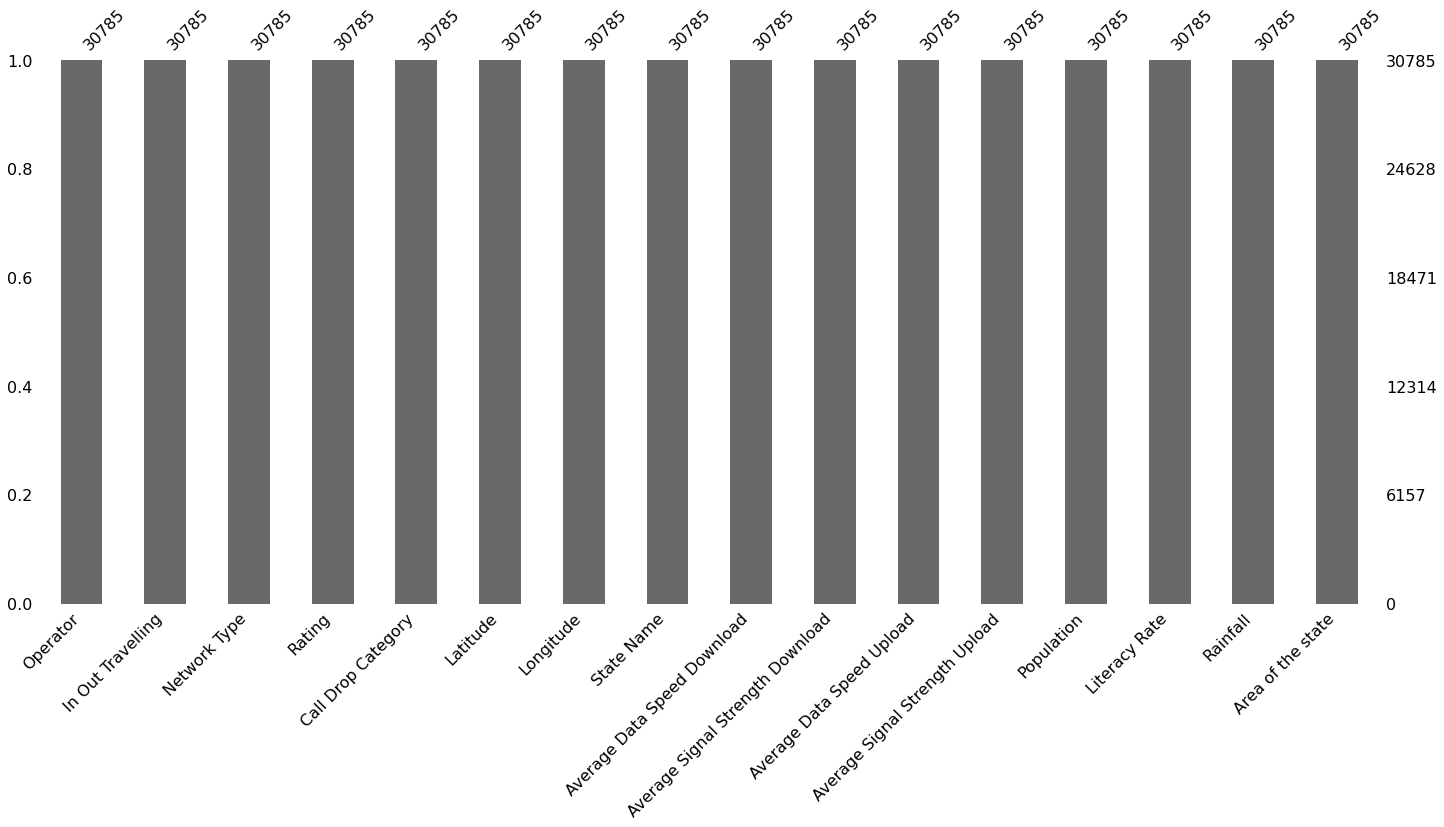

In [11]:
msno.bar(Dataset)

Missingno is a Python library that provides the ability to understand the distribution of missing values through informative visualizations. Visualization of missing values import missingno as msno msno.matrix(Data), msno.heatmap(Data), msno.bar(Data)

So there are no null values here, that's good.

# Checking the number of unique values in each column

In [12]:
for i in Dataset.columns:
    print ("Number of unique values in {} column are {} The unique values are {}".format(i, len(Dataset[i].unique()),Dataset[i].unique()))
    print ("---------------------- \n")

Number of unique values in Operator column are 5 The unique values are ['Airtel' 'Vodafone' 'RJio' 'BSNL' 'Idea']
---------------------- 

Number of unique values in In Out Travelling column are 3 The unique values are ['Indoor' 'Travelling' 'Outdoor']
---------------------- 

Number of unique values in Network Type column are 2 The unique values are ['4G' '3G']
---------------------- 

Number of unique values in Rating column are 5 The unique values are [3 1 5 4 2]
---------------------- 

Number of unique values in Call Drop Category column are 3 The unique values are ['Satisfactory' 'Call Dropped' 'Poor Voice Quality']
---------------------- 

Number of unique values in Latitude column are 16261 The unique values are [12.99850186 23.55419    11.32732904 ... 12.9865925  18.63734
 10.8138617 ]
---------------------- 

Number of unique values in Longitude column are 16054 The unique values are [77.67243651 72.6201102  76.74974316 ... 77.5812663  73.768159
 78.6404056 ]
----------------

Number of unique values in State Name, Population, Literacy Rate, Rainfall, Area of the state are 15. 
It happens because Population, Literacy Rate, Rainfall, Area of the state are related to thier respective states. Means each state have unique values of these columns & they are constant for a particular state. 
So we can choose any one column for state wise analysis.

And let's change type of rating.

In [13]:
# df.column_name = df.column_name.astype(str)
Dataset.Rating = Dataset.Rating.astype(str)

In [14]:
Dataset.dtypes

Operator                             object
In Out Travelling                    object
Network Type                         object
Rating                               object
Call Drop Category                   object
Latitude                            float64
Longitude                           float64
State Name                           object
Average Data Speed Download         float64
Average Signal Strength Download    float64
Average Data Speed Upload           float64
Average Signal Strength Upload      float64
Population                          float64
Literacy Rate                       float64
Rainfall                            float64
Area of the state                   float64
dtype: object

In [15]:
Dataset.Rating.value_counts()

5    11101
4     7396
1     5439
3     4355
2     2494
Name: Rating, dtype: int64

# Extract categorical columns

In [16]:
cat_cols = []
for i in Dataset.columns: 
    if Dataset[i].dtype =='object' : cat_cols.append(i)
print("{} : {} : {} ".format(i,len(np.unique(Dataset[i])),np.unique(Dataset[i])))

Area of the state : 15 : [ 38863.  44212.  50362.  78438.  88752.  94163. 130060. 155707. 160205.
 191791. 196024. 243286. 307713. 308252. 342239.] 


In [17]:
cat_cols

['Operator',
 'In Out Travelling',
 'Network Type',
 'Rating',
 'Call Drop Category',
 'State Name']

In [18]:
Dataset[cat_cols].dtypes

Operator              object
In Out Travelling     object
Network Type          object
Rating                object
Call Drop Category    object
State Name            object
dtype: object

In [19]:
for i in cat_cols: Dataset[i] = Dataset[i].astype('category')

In [20]:
Dataset.dtypes

Operator                            category
In Out Travelling                   category
Network Type                        category
Rating                              category
Call Drop Category                  category
Latitude                             float64
Longitude                            float64
State Name                          category
Average Data Speed Download          float64
Average Signal Strength Download     float64
Average Data Speed Upload            float64
Average Signal Strength Upload       float64
Population                           float64
Literacy Rate                        float64
Rainfall                             float64
Area of the state                    float64
dtype: object

# Extracting Numeric/Continuous Columns

In [21]:
num_cols = [i for i in Dataset.columns if i not in cat_cols]

In [22]:
num_cols

['Latitude',
 'Longitude',
 'Average Data Speed Download',
 'Average Signal Strength Download',
 'Average Data Speed Upload',
 'Average Signal Strength Upload',
 'Population',
 'Literacy Rate',
 'Rainfall',
 'Area of the state']

In [23]:
Dataset.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Operator,30785,5,RJio,15218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In Out Travelling,30785,3,Indoor,20280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Network Type,30785,2,4G,24082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,30785,5,5,11101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Call Drop Category,30785,3,Satisfactory,21327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,30785.0,NaN,NaN,NaN,20.986716,4.904788,8.255166,18.547627,20.303444,25.263877,32.427797
Longitude,30785.0,NaN,NaN,NaN,77.624482,4.897669,69.017391,73.739626,76.945477,80.197102,95.619158
State Name,30785,15,Maharashtra,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Data Speed Download,30785.0,NaN,NaN,NaN,13383.178796,9652.418551,0.0,5191.98,10804.56,20707.87,32444.0696
Average Signal Strength Download,30785.0,NaN,NaN,NaN,-91.940324,189.709705,-8407.0,-92.58,-86.8,-84.74,-63.0


From above we can get Mean, Median, Standard Deviation, Range, 1st and 3rd quantiles of the continuous variables.

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='Operator', ylabel='count'>

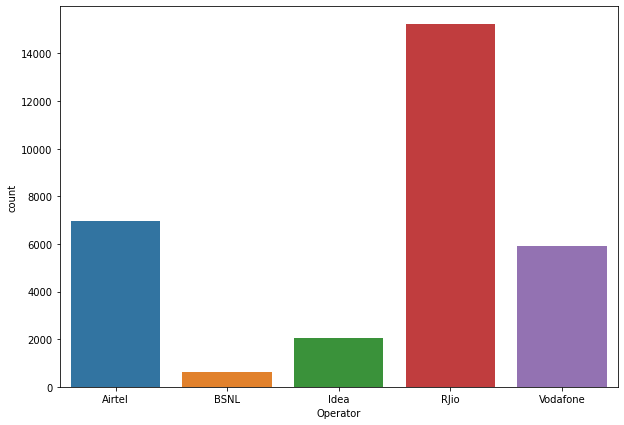

In [24]:
plt.subplots(figsize = (10,7))
sns.countplot(x=Dataset.Operator)

RJio highest count then Airtel & Vodafone

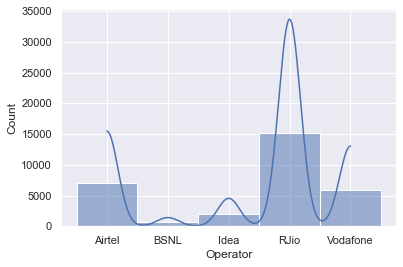

In [25]:
sns.set(style="darkgrid")
sns.histplot(data=Dataset, x="Operator", kde=True)
plt.show()

for continuous 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Dataset['RM'], bins=30)
plt.show()

<AxesSubplot:xlabel='In Out Travelling', ylabel='count'>

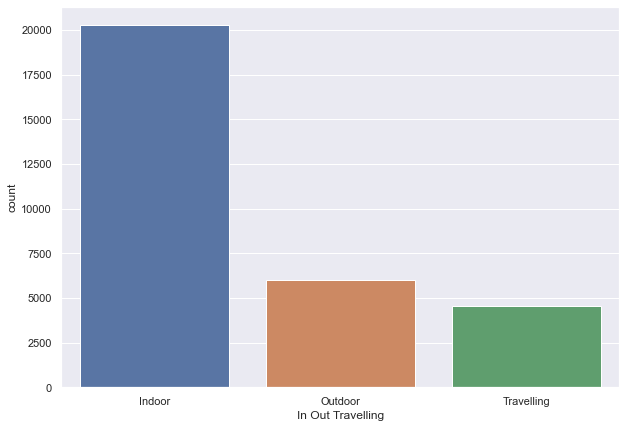

In [26]:
plt.subplots(figsize = (10,7))
sns.countplot(x=Dataset['In Out Travelling'])

Indoor count is alot higher than others

<AxesSubplot:xlabel='Network Type', ylabel='count'>

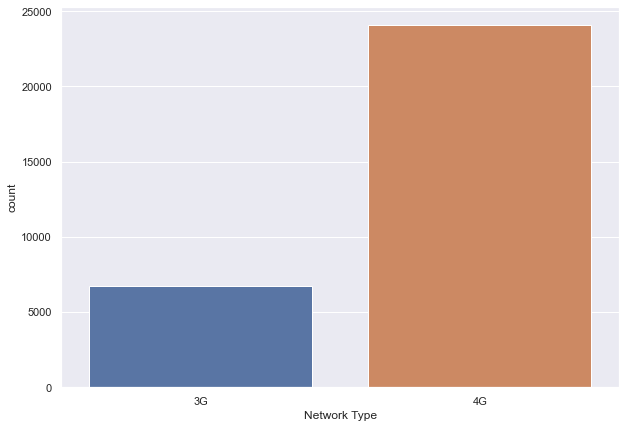

In [27]:
plt.subplots(figsize = (10,7))
sns.countplot(x=Dataset['Network Type'])

4G & RJio, they have a direct connection (RJio has only 4G network type)

<AxesSubplot:xlabel='Rating', ylabel='count'>

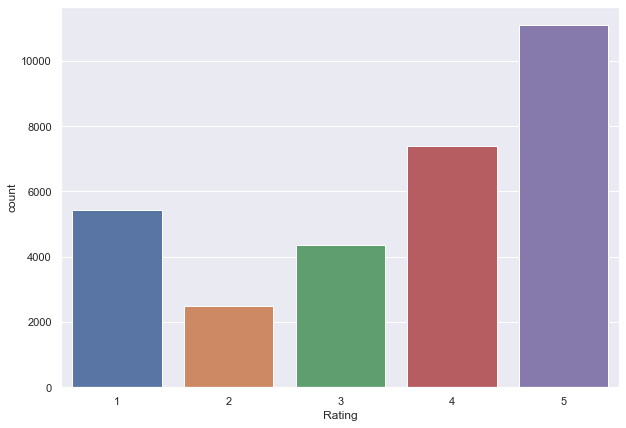

In [28]:
plt.subplots(figsize = (10,7))
sns.countplot(x=Dataset.Rating)

Extreme ratings are high 

<AxesSubplot:xlabel='Call Drop Category', ylabel='count'>

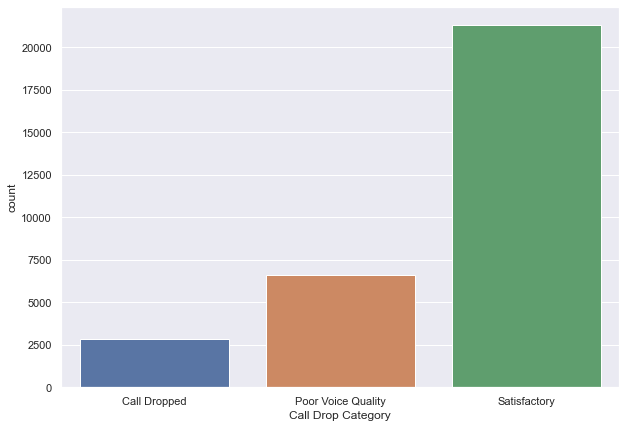

In [29]:
plt.subplots(figsize = (10,7))
sns.countplot(x=Dataset['Call Drop Category'])

More number of customers are Satisfactory 

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


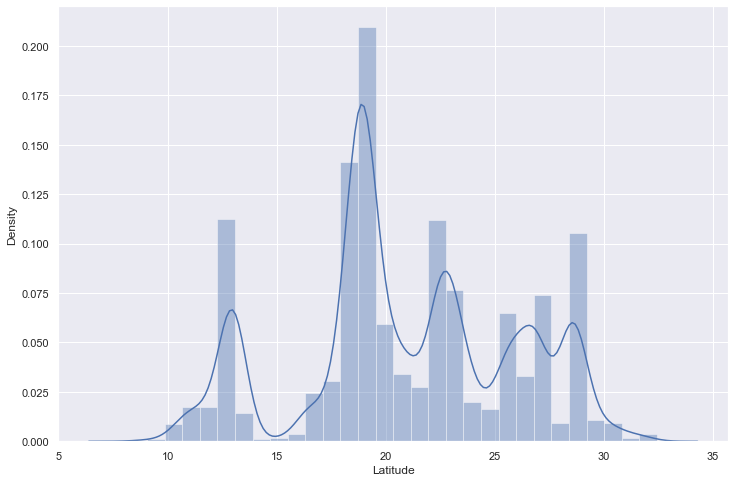

In [30]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(Dataset['Latitude'], bins=30)
plt.show()

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


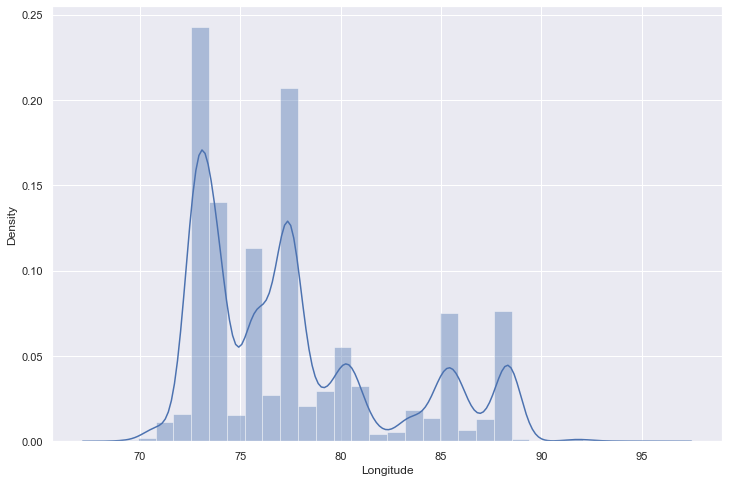

In [31]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(Dataset['Longitude'], bins=30)
plt.show()

<AxesSubplot:xlabel='State Name', ylabel='count'>

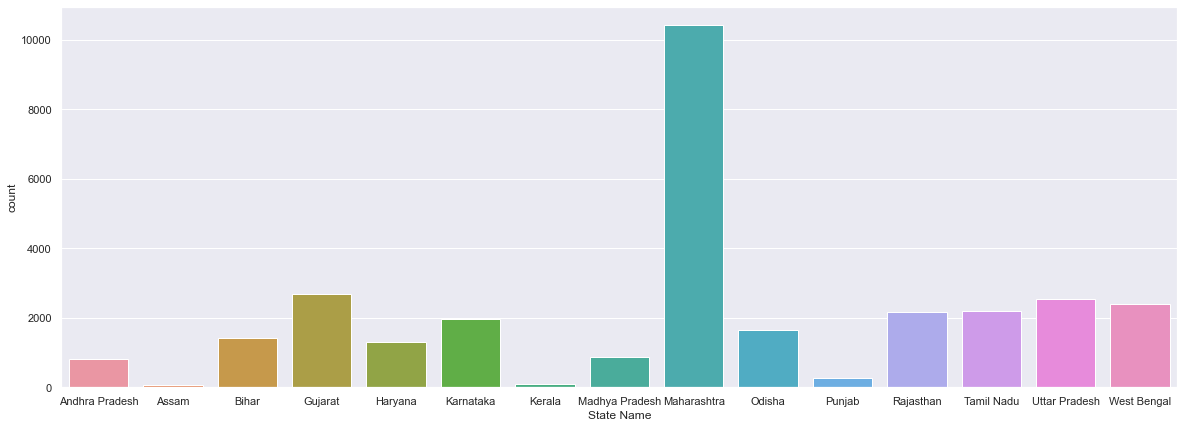

In [32]:
plt.subplots(figsize = (20,7))
sns.countplot(x=Dataset['State Name'])
# Maharashtra have exceptional higher count ccompare to others

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


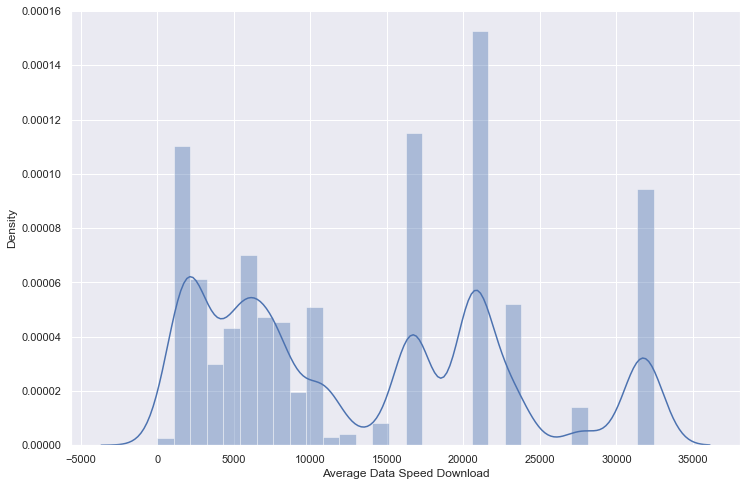

In [33]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(Dataset['Average Data Speed Download'], bins=30)
plt.show()

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


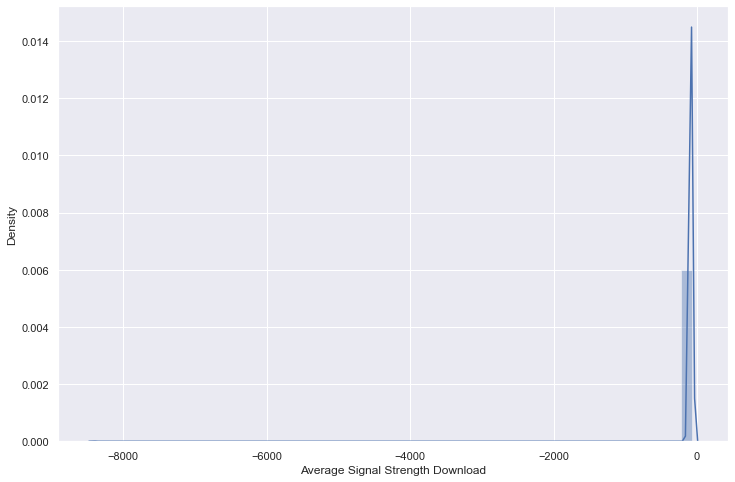

In [34]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(Dataset['Average Signal Strength Download'])
plt.show()

In [35]:
Dataset['Average Signal Strength Download']

0        -94.860
1        -91.960
2        -85.030
3        -89.390
4        -94.050
          ...   
30780    -72.990
30781    -72.990
30782   -101.000
30783    -96.882
30784    -95.011
Name: Average Signal Strength Download, Length: 30785, dtype: float64

mean = -91.940324,	minimum = -8407.0,	maximum = -63.0
alot of values are around -100 to -80

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


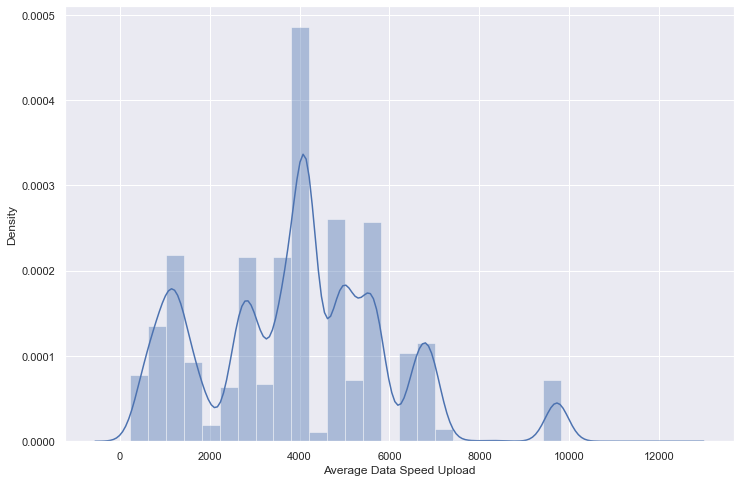

In [36]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(Dataset['Average Data Speed Upload'], bins=30)
plt.show()

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


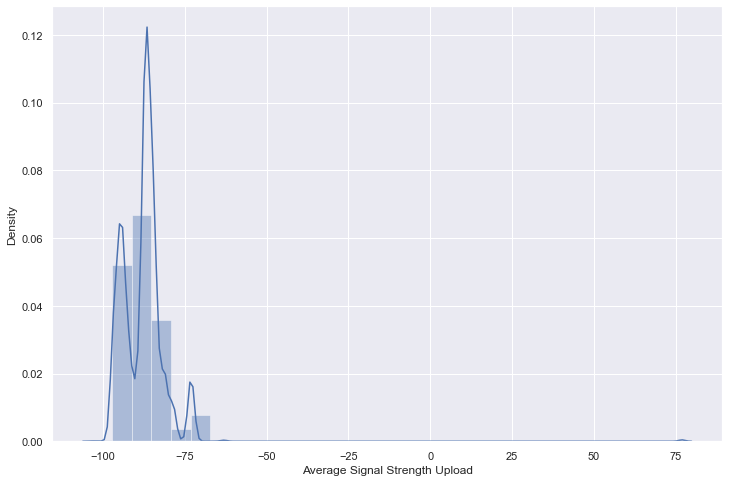

In [37]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(Dataset['Average Signal Strength Upload'], bins=30)
plt.show()

mean = -87.654863, minimum = -103.2, maximum = 76.93

Population, Literacy Rate, Rainfall, Area of the state will be unique for a particular state 

Maharashtra count is high that's why any feature which is related to Maharashtra will have higher count and can affect distribution.

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


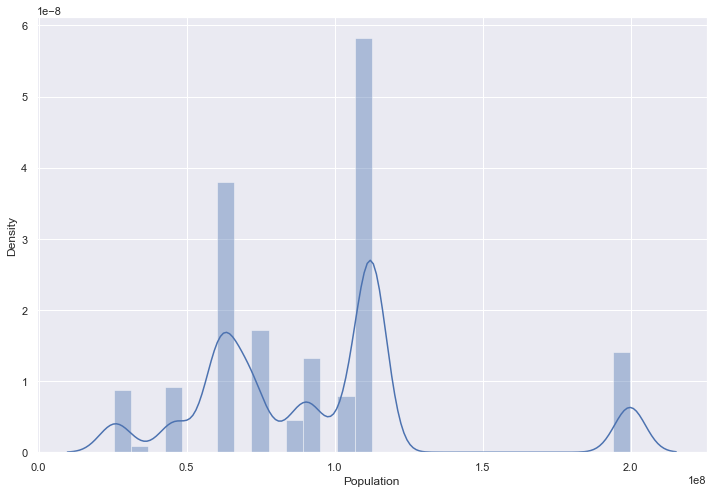

In [38]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(Dataset['Population'], bins=30)
plt.show()

On the X-axis numbers are in multiple of 10^8

mean = 93404896.47325, minimum = 25351462.0, maximum = 199812341.0

In [39]:
Dataset.pivot_table(values ='Population',index='State Name')

,Population
State Name,
Andhra Pradesh,84580777.0
Assam,31205576.0
Bihar,104099452.0
Gujarat,60439692.0
Haryana,25351462.0
Karnataka,61130704.0
Kerala,33387677.0
Madhya Pradesh,72626809.0
Maharashtra,112374333.0


<AxesSubplot:xlabel='Population', ylabel='count'>

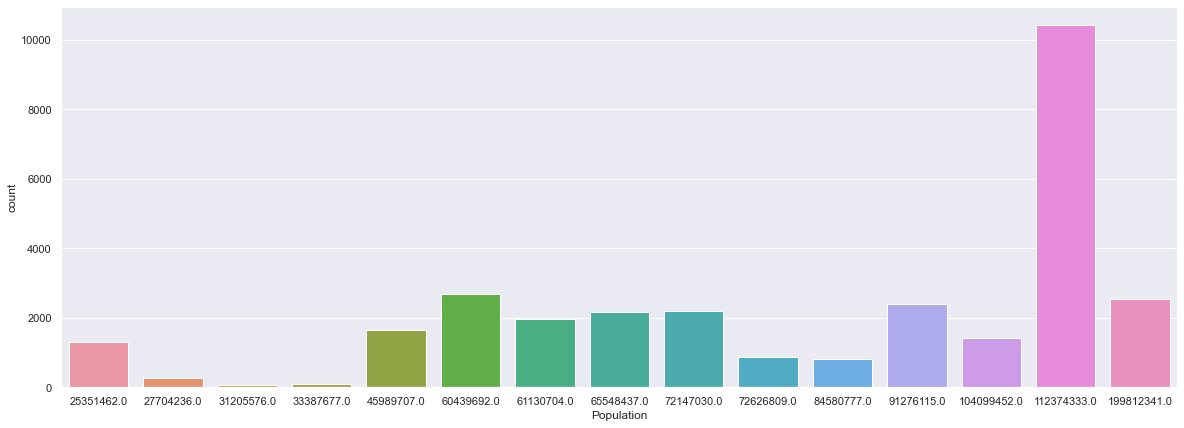

In [40]:
plt.subplots(figsize = (20,7))
sns.countplot(x=Dataset['Population'])

Maharashtra population = 112374333.0, and we already seen that maharashtra have highest count now we know why, because higher the population can get us higher count

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


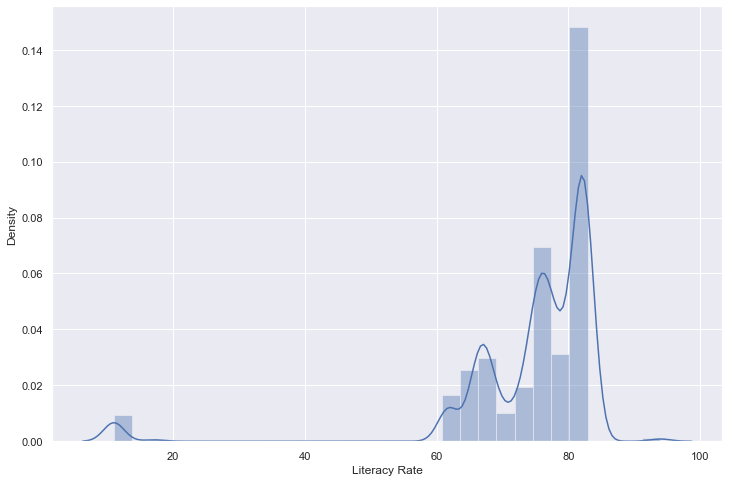

In [41]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(Dataset['Literacy Rate'], bins=30)
plt.show()

<AxesSubplot:xlabel='Literacy Rate', ylabel='count'>

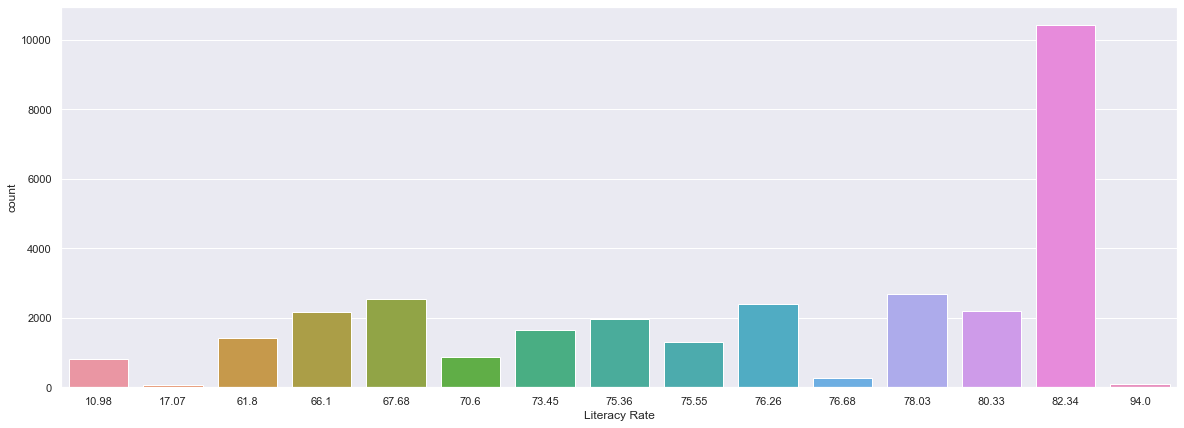

In [42]:
plt.subplots(figsize = (20,7))
sns.countplot(x=Dataset['Literacy Rate'])

In [43]:
Dataset.pivot_table(values ='Literacy Rate',index='State Name')

,Literacy Rate
State Name,
Andhra Pradesh,10.98
Assam,17.07
Bihar,61.80
Gujarat,78.03
Haryana,75.55
Karnataka,75.36
Kerala,94.00
Madhya Pradesh,70.60
Maharashtra,82.34


mean = 74.513815, minimum = 10.98 (Andhra Pradesh), maximum = 94.0 (Kerala)
Maharashtra Literacy rate is 82.34
Maharashtra count is high that's why Maharashtra literacy rate count is also higher, note that Maharashtra literacy rate is not the largest but here count is high.

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


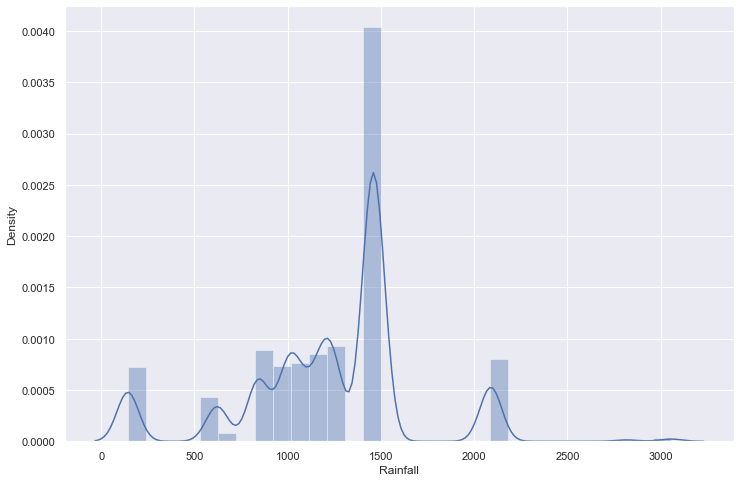

In [44]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(Dataset.Rainfall, bins=30)
plt.show()

<AxesSubplot:xlabel='Rainfall', ylabel='count'>

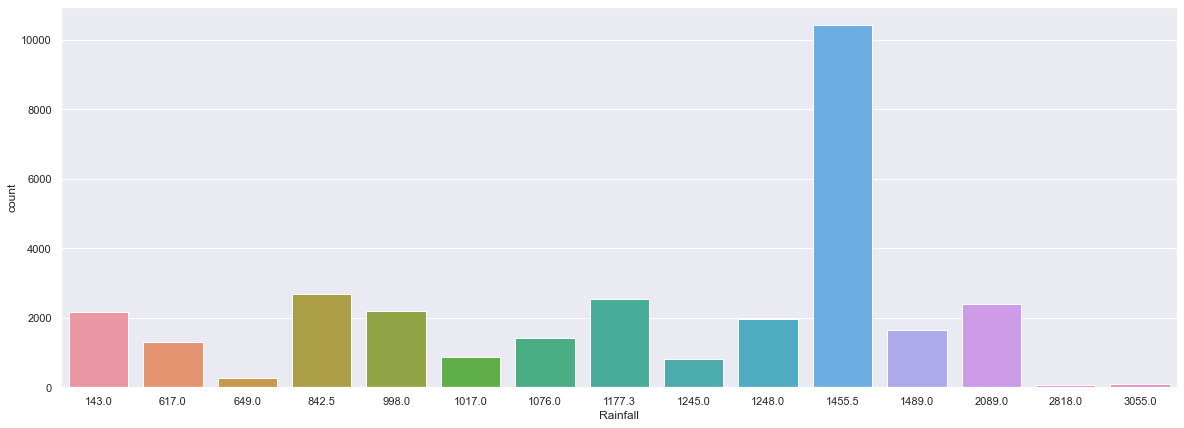

In [45]:
plt.subplots(figsize = (20,7))
sns.countplot(x=Dataset['Rainfall'])

In [46]:
Dataset.pivot_table(values ='Rainfall',index='State Name')

,Rainfall
State Name,
Andhra Pradesh,1245.0
Assam,2818.0
Bihar,1076.0
Gujarat,842.5
Haryana,617.0
Karnataka,1248.0
Kerala,3055.0
Madhya Pradesh,1017.0
Maharashtra,1455.5


mean = 1222.318883,	minimum = 143.0 (Rajasthan), maximum = 3055.0 (Kerala)
Maharashtra rainfall is	1455.5 
Maharashtra count is high that's why Maharashtra rainfall count is also higher, note that Maharashtra rainfall is not the largest but here count is high.

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


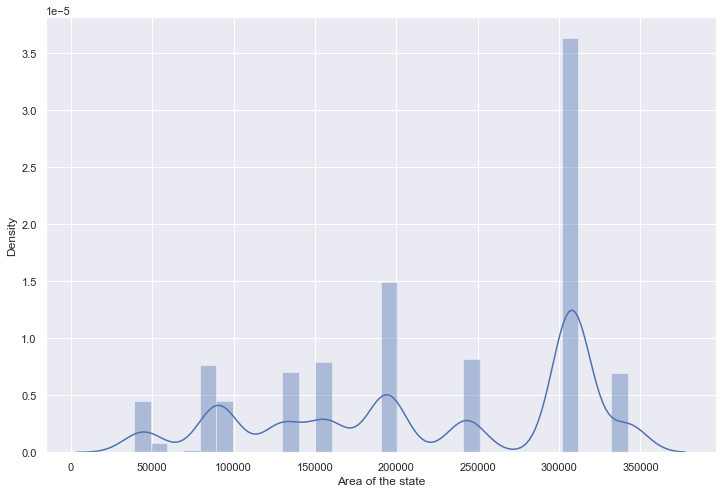

In [47]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(Dataset['Area of the state'], bins=30)
plt.show()

<AxesSubplot:xlabel='Area of the state', ylabel='count'>

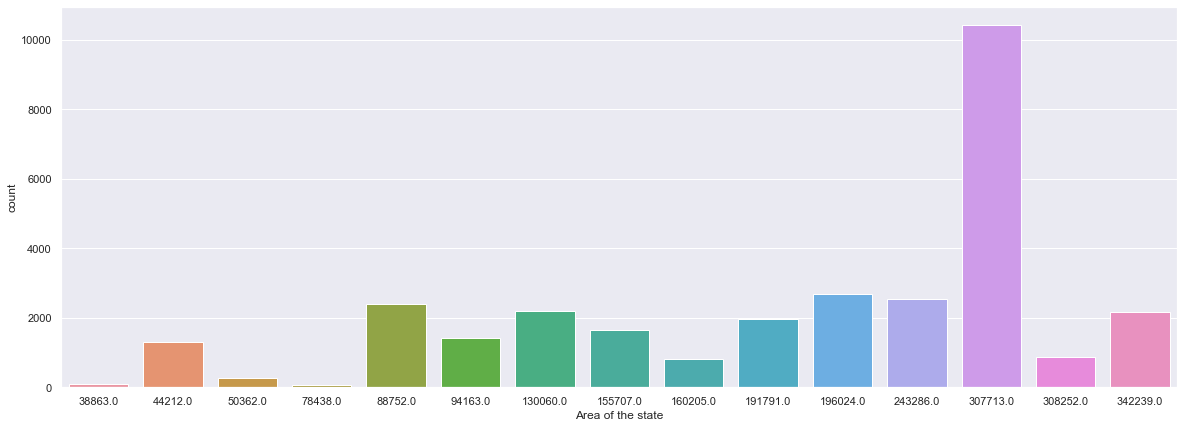

In [48]:
plt.subplots(figsize = (20,7))
sns.countplot(x=Dataset['Area of the state'])

In [49]:
Dataset.pivot_table(values ='Area of the state',index='State Name')

,Area of the state
State Name,
Andhra Pradesh,160205.0
Assam,78438.0
Bihar,94163.0
Gujarat,196024.0
Haryana,44212.0
Karnataka,191791.0
Kerala,38863.0
Madhya Pradesh,308252.0
Maharashtra,307713.0


mean = 221781.967549, minimum = 38863.0 (Kerala), maximum = 342239.0 (Rajasthan)
Maharashtra area	307713.0
Maharashtra count is high that's why Maharashtra area count is also higher, note that Maharashtra area is not the largest but here count is high.

<AxesSubplot:>

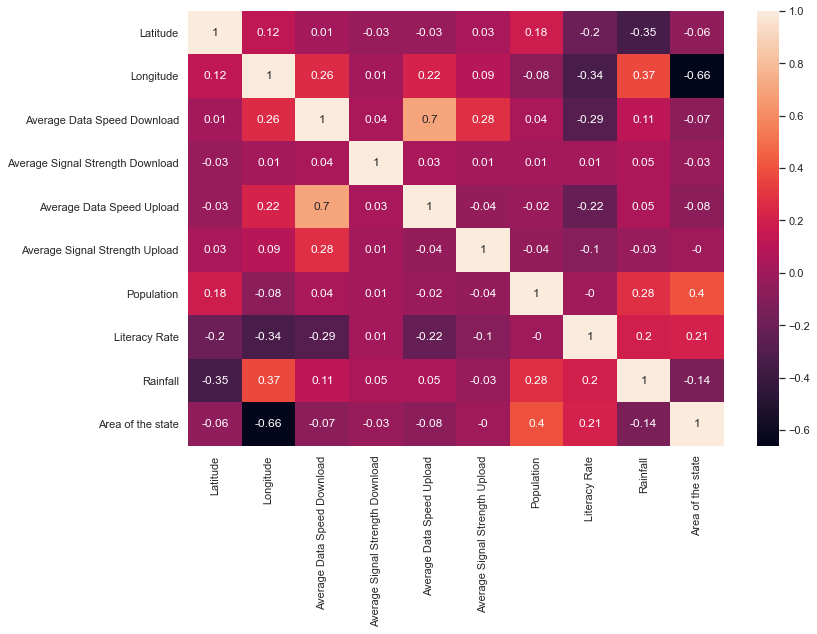

In [50]:
correlation_matrix = Dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [51]:
correlation_matrix

,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
Latitude,1.00,0.12,0.01,-0.03,-0.03,0.03,0.18,-0.20,-0.35,-0.06
Longitude,0.12,1.00,0.26,0.01,0.22,0.09,-0.08,-0.34,0.37,-0.66
Average Data Speed Download,0.01,0.26,1.00,0.04,0.70,0.28,0.04,-0.29,0.11,-0.07
Average Signal Strength Download,-0.03,0.01,0.04,1.00,0.03,0.01,0.01,0.01,0.05,-0.03
Average Data Speed Upload,-0.03,0.22,0.70,0.03,1.00,-0.04,-0.02,-0.22,0.05,-0.08
Average Signal Strength Upload,0.03,0.09,0.28,0.01,-0.04,1.00,-0.04,-0.10,-0.03,-0.00
Population,0.18,-0.08,0.04,0.01,-0.02,-0.04,1.00,-0.00,0.28,0.40
Literacy Rate,-0.20,-0.34,-0.29,0.01,-0.22,-0.10,-0.00,1.00,0.20,0.21
Rainfall,-0.35,0.37,0.11,0.05,0.05,-0.03,0.28,0.20,1.00,-0.14
Area of the state,-0.06,-0.66,-0.07,-0.03,-0.08,-0.00,0.40,0.21,-0.14,1.00


The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

Average Data Speed Download & Upload (0.7), 

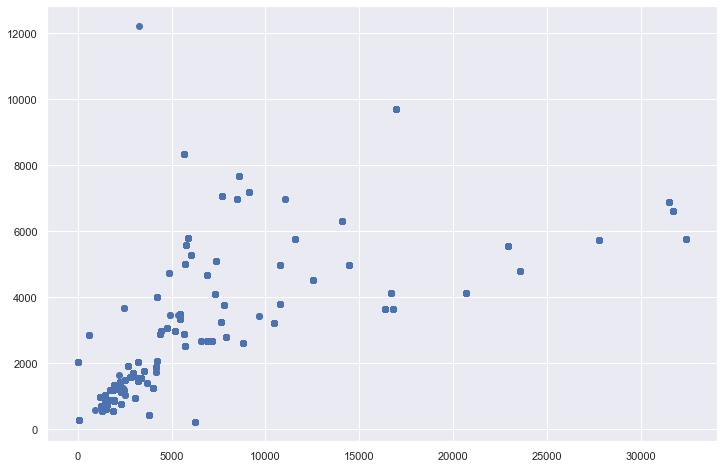

In [52]:
plt.scatter(x=Dataset['Average Data Speed Download'],y=Dataset['Average Data Speed Upload'])

As Download speed increasing on X-axis Upload speed also following on Y-axis 

# Bivariate Analysis

Chi-square tests

Contingency tables are used in statistics to summarize the relationship between several categorical variables.
A chi-squared test conducted on a contingency table can test whether or not a relationship exists between variables. These effects are defined as relationships between rows and columns.
The p-value is the evidence against a null hypothesis. The smaller the p-value, the strong the evidence that you should reject the null hypothesis.
This test basically tells you if the relationship between variables is Significant or came by chance!
So if you have high level of Significance (high p-value), that means there's a significant dependency between the variables!

For Chi-square test first we need to get data(count) in tabular form and those will be observed values. After that we can find expected values for each cell and than find chi^2 value for the table. After that will get P value and degree of freedom will be (row-1)*(column-1).

So for independence tests we always have null hypothesis that the given features are independent

Ho = Features are independent.
H1 = Features are not independent 

p-value > alpha(0.05) or critical chi2 > calculated chi2 -- will accept the null hypothesis.

In [53]:
cat_cols

['Operator',
 'In Out Travelling',
 'Network Type',
 'Rating',
 'Call Drop Category',
 'State Name']

Network Type and State Name

In [54]:
State_Network_Type = pd.crosstab(index=Dataset['State Name'],columns=Dataset['Network Type'])

In [55]:
pd.crosstab(index=Dataset['State Name'],columns=Dataset['Network Type'],margins=True)

Network Type,3G,4G,All
State Name,,,
Andhra Pradesh,43,766,809
Assam,7,53,60
Bihar,33,1371,1404
Gujarat,899,1772,2671
Haryana,297,1007,1304
Karnataka,296,1671,1967
Kerala,97,0,97
Madhya Pradesh,237,635,872
Maharashtra,2238,8184,10422


In [56]:
State_Network_Type

Network Type,3G,4G
State Name,,
Andhra Pradesh,43,766
Assam,7,53
Bihar,33,1371
Gujarat,899,1772
Haryana,297,1007
Karnataka,296,1671
Kerala,97,0
Madhya Pradesh,237,635
Maharashtra,2238,8184


In [57]:
State_Network_Type.iloc[3].values

array([ 899, 1772], dtype=int64)

In [58]:
from scipy import stats

In [59]:
chi2, p, dof, ex = stats.chi2_contingency(State_Network_Type, correction=True, lambda_=None)

In [60]:
print('chi2 : ',chi2)
print('P value : ', p)
print('DOF : ', dof)

chi2 :  1647.697278177348
P value :  0.0
DOF :  14


 P value is < 0.05, will reject the null hypothesis. Means State Name & Network Type are not independent. 

In [61]:
# Expected table
print(ex)

[[ 176.14835147  632.85164853]
 [  13.06415462   46.93584538]
 [ 305.70121813 1098.29878187]
 [ 581.57261653 2089.42738347]
 [ 283.92762709 1020.07237291]
 [ 428.28653565 1538.71346435]
 [  21.1203833    75.8796167 ]
 [ 189.86571382  682.13428618]
 [2269.24365763 8152.75634237]
 [ 358.39330843 1287.60669157]
 [  55.74039305  200.25960695]
 [ 471.18050999 1692.81949001]
 [ 478.58353094 1719.41646906]
 [ 551.08958909 1979.91041091]
 [ 519.08241026 1864.91758974]]


In Out Travelling and Call Drop Category

In [62]:
InOutTravelling_CallDropCategory = pd.crosstab(index=Dataset['In Out Travelling'],columns=Dataset['Call Drop Category'])

In [63]:
InOutTravelling_CallDropCategory

Call Drop Category,Call Dropped,Poor Voice Quality,Satisfactory
In Out Travelling,,,
Indoor,2154,4191,13935
Outdoor,333,1328,4316
Travelling,339,1113,3076


In [64]:
chi2, p, dof, ex = stats.chi2_contingency(InOutTravelling_CallDropCategory, correction=True, lambda_=None)

In [65]:
print('chi2 : ',chi2)
print('P value : ', p)
print('DOF : ', dof)

chi2 :  182.26108923068603
P value :  2.437311171808449e-38
DOF :  4


 P value is < 0.05, will reject the null hypothesis. Means In Out Travelling & Call Drop Category are not independent. 

Operator and Call Drop Category

In [66]:
Operator_CallDropCategory = pd.crosstab(index=Dataset['Operator'],columns=Dataset['Call Drop Category'])

In [67]:
Operator_CallDropCategory

Call Drop Category,Call Dropped,Poor Voice Quality,Satisfactory
Operator,,,
Airtel,1265,1739,3978
BSNL,37,169,433
Idea,162,753,1135
RJio,900,3036,11282
Vodafone,462,935,4499


In [68]:
chi2, p, dof, ex = stats.chi2_contingency(Operator_CallDropCategory, correction=True, lambda_=None)

In [69]:
print('chi2 : ',chi2)
print('P value : ', p)
print('DOF : ', dof)

chi2 :  1481.306911551152
P value :  0.0
DOF :  8


P value is < 0.05, will reject the null hypothesis. Means Operator & Call Drop Category are not independent. 

Operator and Network Type

In [70]:
Operator_NetworkType = pd.crosstab(index=Dataset['Operator'],columns=Dataset['Network Type'])

In [71]:
Operator_NetworkType

Network Type,3G,4G
Operator,,
Airtel,2501,4481
BSNL,590,49
Idea,963,1087
RJio,0,15218
Vodafone,2649,3247


In [72]:
chi2, p, dof, ex = stats.chi2_contingency(Operator_NetworkType, correction=True, lambda_=None)

In [73]:
print('chi2 : ',chi2)
print('P value : ', p)
print('DOF : ', dof)

chi2 :  9532.764308407257
P value :  0.0
DOF :  4


P value is < 0.05, will reject the null hypothesis. Means Operator & Network Type are not independent. 

Pearson Correlation Coefficient

The most commomnly used measure to test if a linear relation exist between two variables, is the Pearson Correlation Coefficient. It varies between -1 to 1, representing positive & negative relation. 

0 means no linear relation but there can be a non-linear relation.

In [74]:
num_cols
# continuous variables

['Latitude',
 'Longitude',
 'Average Data Speed Download',
 'Average Signal Strength Download',
 'Average Data Speed Upload',
 'Average Signal Strength Upload',
 'Population',
 'Literacy Rate',
 'Rainfall',
 'Area of the state']

In [75]:
Dataset[num_cols].dtypes

Latitude                            float64
Longitude                           float64
Average Data Speed Download         float64
Average Signal Strength Download    float64
Average Data Speed Upload           float64
Average Signal Strength Upload      float64
Population                          float64
Literacy Rate                       float64
Rainfall                            float64
Area of the state                   float64
dtype: object

In [76]:
 continuous_variables_df = Dataset[num_cols]

In [77]:
continuous_variables_df.isnull().mean()

Latitude                            0.0
Longitude                           0.0
Average Data Speed Download         0.0
Average Signal Strength Download    0.0
Average Data Speed Upload           0.0
Average Signal Strength Upload      0.0
Population                          0.0
Literacy Rate                       0.0
Rainfall                            0.0
Area of the state                   0.0
dtype: float64

In [78]:
continuous_variables_df.head(10)

,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,12.998502,77.672437,8807.910,-94.860,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,23.554190,72.620110,6862.552,-91.960,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,11.327329,76.749743,1178.410,-85.030,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,22.279660,73.149369,5694.480,-89.390,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,18.546344,73.819090,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
5,18.546627,73.819532,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
6,18.547528,73.819105,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
7,18.547528,73.819105,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
8,10.583104,77.263595,7914.680,-95.011,2788.90,-95.093,72147030.0,80.33,998.0,130060.0
9,29.672815,77.007663,7170.630,-94.578,2680.02,-94.650,25351462.0,75.55,617.0,44212.0


In [79]:
continuous_variables_df.corr()

,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
Latitude,1.000000,0.124229,0.006230,-0.026600,-0.032982,0.027047,0.180954,-0.204830,-0.346943,-0.062440
Longitude,0.124229,1.000000,0.255810,0.013536,0.222827,0.086698,-0.081998,-0.337597,0.372490,-0.656431
Average Data Speed Download,0.006230,0.255810,1.000000,0.035435,0.698465,0.283802,0.039678,-0.287473,0.105436,-0.065393
Average Signal Strength Download,-0.026600,0.013536,0.035435,1.000000,0.025573,0.014232,0.013990,0.011133,0.053324,-0.029486
Average Data Speed Upload,-0.032982,0.222827,0.698465,0.025573,1.000000,-0.038725,-0.016013,-0.217753,0.049883,-0.080940
Average Signal Strength Upload,0.027047,0.086698,0.283802,0.014232,-0.038725,1.000000,-0.044444,-0.103904,-0.028081,-0.002642
Population,0.180954,-0.081998,0.039678,0.013990,-0.016013,-0.044444,1.000000,-0.002591,0.280014,0.399032
Literacy Rate,-0.204830,-0.337597,-0.287473,0.011133,-0.217753,-0.103904,-0.002591,1.000000,0.198137,0.210401
Rainfall,-0.346943,0.372490,0.105436,0.053324,0.049883,-0.028081,0.280014,0.198137,1.000000,-0.135894
Area of the state,-0.062440,-0.656431,-0.065393,-0.029486,-0.080940,-0.002642,0.399032,0.210401,-0.135894,1.000000


<AxesSubplot:>

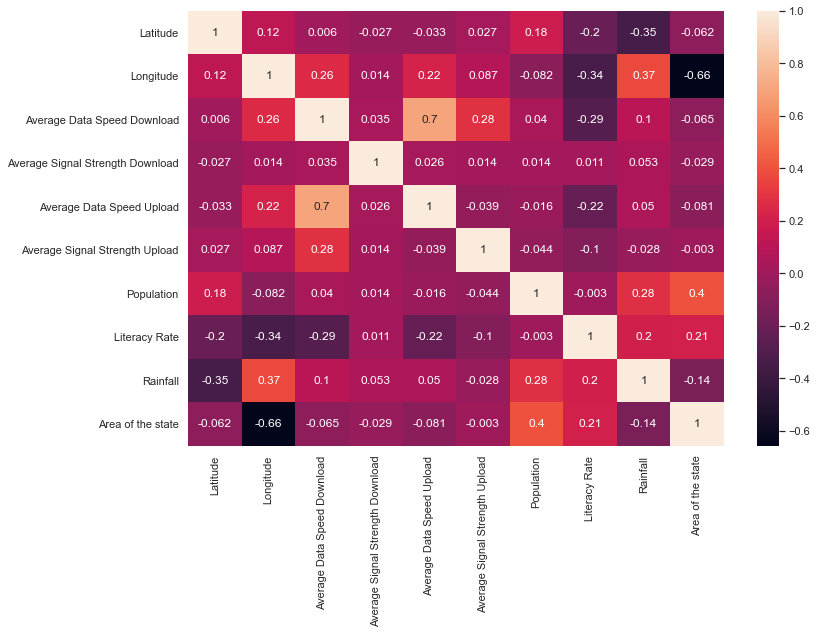

In [80]:
correlation_matrix = continuous_variables_df.corr().round(3)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [81]:
from scipy.stats import pearsonr

In [82]:
from pingouin import corr

In [83]:
pearsonr(continuous_variables_df['Latitude'],continuous_variables_df['Longitude'])

(0.12422931781830047, 3.9612896232564383e-106)

In [84]:
corr(continuous_variables_df['Latitude'],continuous_variables_df['Longitude'])

,n,r,CI95%,p-val,BF10,power
pearson,30785,0.124229,"[0.11, 0.14]",3.961290e-106,6.486e+101,1.0


<AxesSubplot:xlabel='Operator', ylabel='Population'>

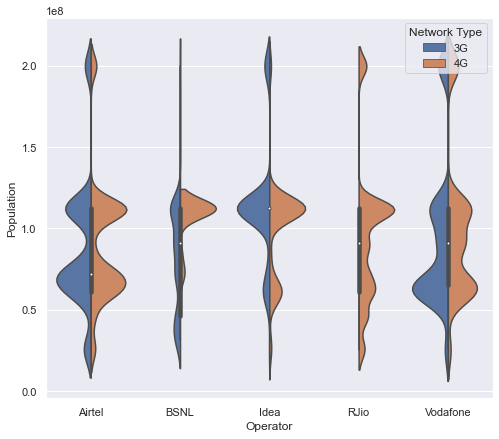

In [85]:
plt.subplots(figsize = (8,7))
sns.violinplot(x ="Operator", y ="Population", hue ="Network Type", data = Dataset, split = True)

<AxesSubplot:xlabel='Operator', ylabel='Average Data Speed Download'>

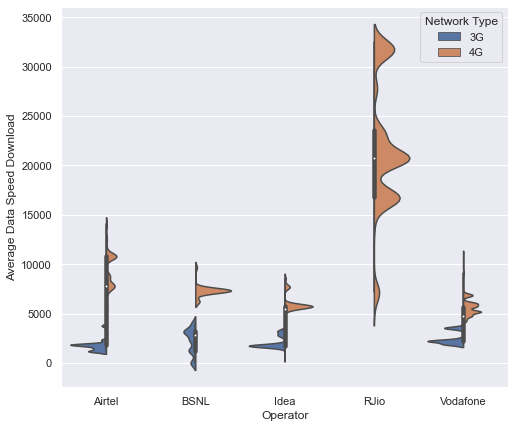

In [86]:
plt.subplots(figsize = (8,7))
sns.violinplot(x ="Operator", y ="Average Data Speed Download", hue ="Network Type", data = Dataset, split = True)

<AxesSubplot:xlabel='Operator', ylabel='Average Data Speed Upload'>

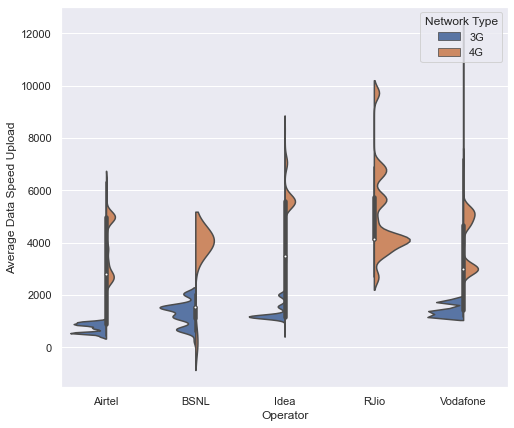

In [87]:
plt.subplots(figsize = (8,7))
sns.violinplot(x ="Operator", y ="Average Data Speed Upload", hue ="Network Type", data = Dataset, split = True)

<AxesSubplot:xlabel='Operator', ylabel='Average Signal Strength Upload'>

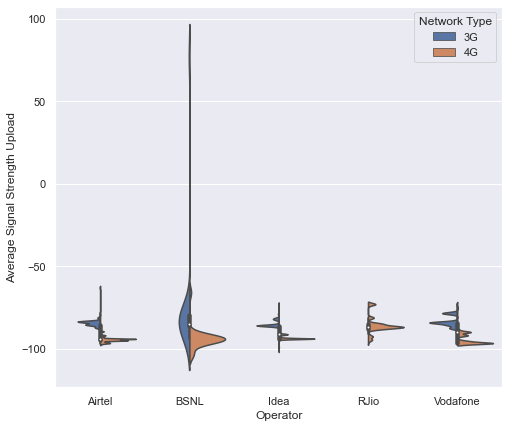

In [88]:
plt.subplots(figsize = (8,7))
sns.violinplot(x ="Operator", y ="Average Signal Strength Upload", hue ="Network Type", data = Dataset, split = True)

<AxesSubplot:xlabel='Operator', ylabel='Latitude'>

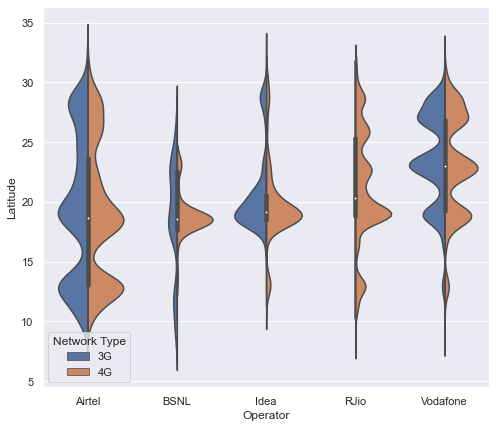

In [89]:
plt.subplots(figsize = (8,7))
sns.violinplot(x ="Operator", y ="Latitude", hue ="Network Type", data = Dataset, split = True)

<AxesSubplot:xlabel='Operator', ylabel='Longitude'>

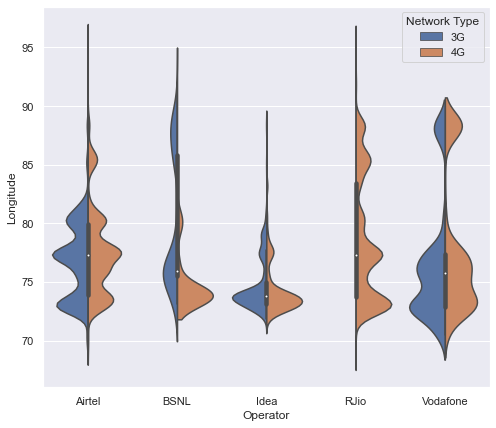

In [90]:
plt.subplots(figsize = (8,7))
sns.violinplot(x ="Operator", y ="Longitude", hue ="Network Type", data = Dataset, split = True)

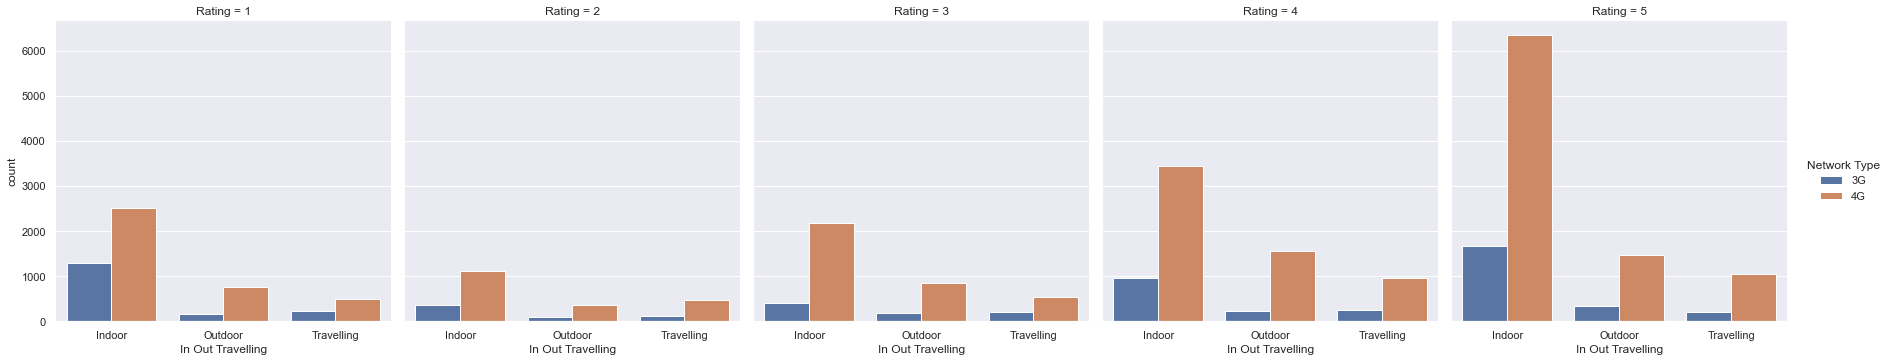

In [91]:
sns.catplot(x ='In Out Travelling', hue ='Network Type',kind ='count', col ='Rating', data = Dataset)

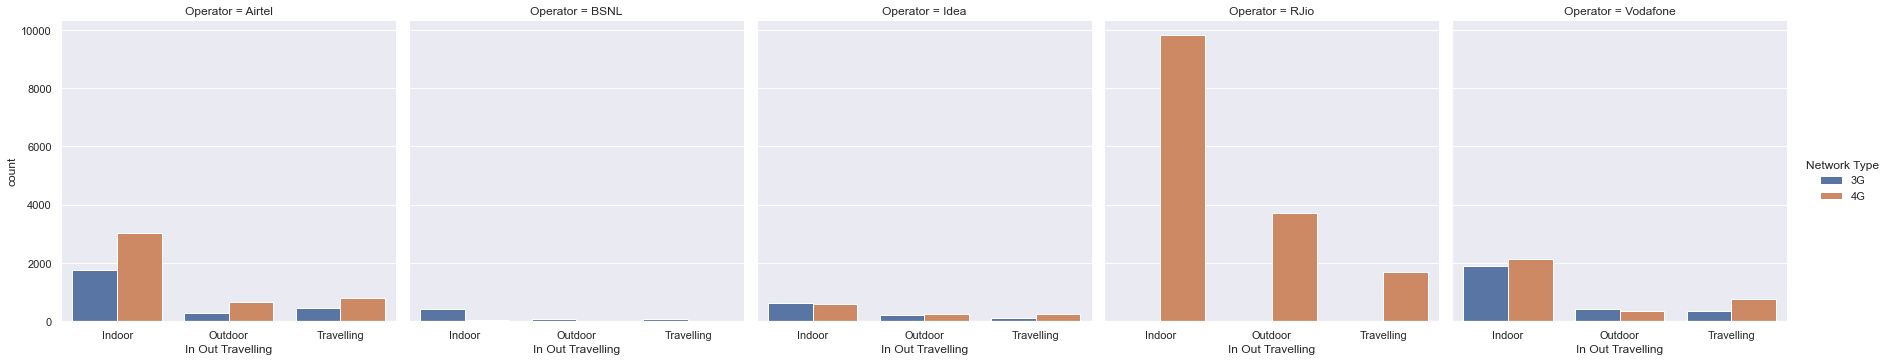

In [92]:
sns.catplot(x ='In Out Travelling', hue ='Network Type',kind ='count', col ='Operator', data = Dataset)

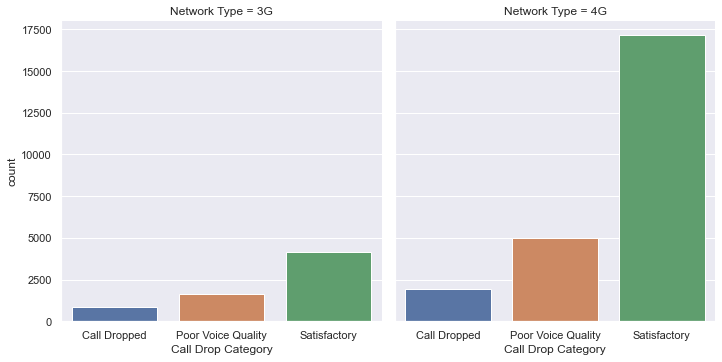

In [93]:
sns.catplot(x ='Call Drop Category',kind ='count', col ='Network Type', data = Dataset)

([<matplotlib.patches.Wedge at 0x1dd9c14cb50>,
 [Text(0.4664874735897651, 0.9961874507259355, '1'),
  Text(-1.0919396464108413, 0.13292030919376813, '2'),
  Text(-0.41018145578840903, -1.0206621249597252, '3'),
  Text(0.6367624483450283, -0.8969579613212904, '4'),
  Text(1.0645650972718919, -0.27694973130603956, '5')])

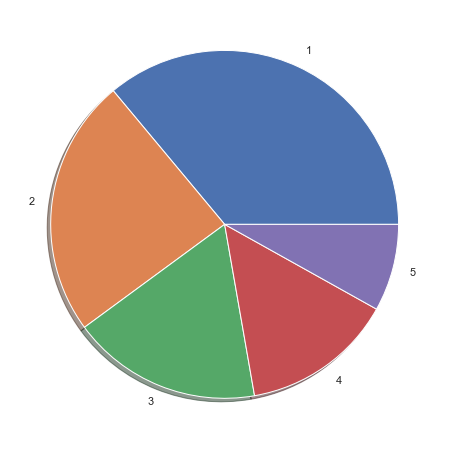

In [94]:
plt.figure(figsize=(8,8))
plt.pie(Dataset['Rating'].value_counts(),labels=['1','2','3','4','5'],shadow=True)

<AxesSubplot:xlabel='Network Type', ylabel='Population'>

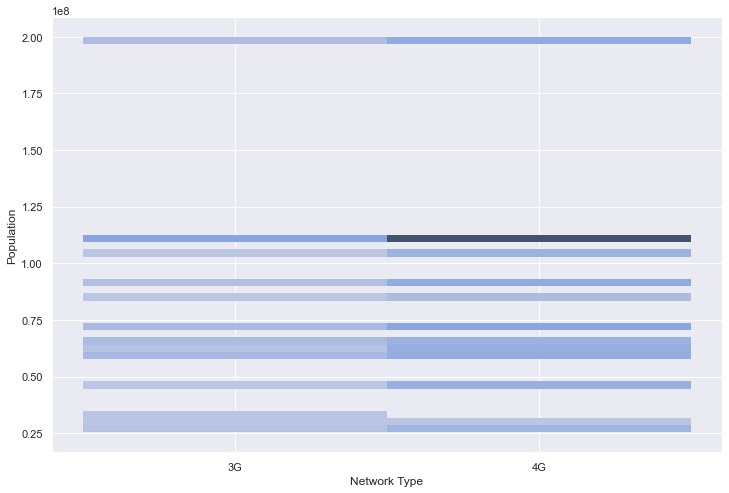

In [95]:
sns.histplot(data=Dataset, x='Network Type', y='Population')

# Regression Analysis

In [96]:
categorical_variables_df = Dataset[cat_cols]

In [97]:
continuous_variables_df.shape

(30785, 10)

In [98]:
categorical_variables_df.shape

(30785, 6)

In [99]:
Dataset.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


We need to predict Average Data Speed Download, Average Signal Strength Download, Average Data Speed Upload, and Average Signal Strength Upload variables by using four different Regression models.

For all this we can use KFold/StratifiedKFold & GridSearchCV.
KFold for to get training test sets, number of iteration let it be default and GridSearchCV for selection of best combination of hyperparameters for models.

In [100]:
# Latitude and Longitude as input variables
X = Dataset.iloc[:,5:7]

In [101]:
X.shape

(30785, 2)

In [102]:
scaler = StandardScaler()

In [103]:
X_scaled = scaler.fit_transform(X)

In [104]:
X_scaled
# So we scaled our input data features

array([[-1.62868275,  0.0097915 ],
       [ 0.52347115, -1.02180292],
       [-1.969411  , -0.17860593],
       ...,
       [-1.6311109 , -0.00882382],
       [-0.47900427, -0.78739194],
       [-2.07409965,  0.20743342]])

# Target variable number 1 is Average Data Speed Download

In [105]:
Y1 = Dataset.iloc[:,8:9]

In [106]:
Y1

,Average Data Speed Download
0,8807.910
1,6862.552
2,1178.410
3,5694.480
4,10804.560
...,...
30780,31502.050
30781,31502.050
30782,905.000
30783,5191.980


In [107]:
Y1_scaled = scaler.fit_transform(Y1)

In [108]:
Y1_scaled.shape

(30785, 1)

In [109]:
Y1 = Y1.values.reshape(-1,1)

In [110]:
Y1

array([[8807.91 ],
       [6862.552],
       [1178.41 ],
       ...,
       [ 905.   ],
       [5191.98 ],
       [7914.68 ]])

In [111]:
skf = StratifiedKFold()

In [112]:
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [113]:
kf = KFold()

In [114]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [115]:
for train_index, test_index in kf.split(X_scaled,Y1):
    X_train, X_test, Y1_train, Y1_test = X_scaled[train_index], X_scaled[test_index], Y1[train_index], Y1[test_index]

In [116]:
X_train.shape, X_test.shape, Y1_train.shape, Y1_test.shape

((24628, 2), (6157, 2), (24628, 1), (6157, 1))

In [117]:
train_index,test_index

(array([    0,     1,     2, ..., 24625, 24626, 24627]),
 array([24628, 24629, 24630, ..., 30782, 30783, 30784]))

Linear Regression,DecisionTreeRegressor,RandomForestRegressor,XGB regressor, KNN regression  

In [118]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [119]:
rmse_val = []
for K in range(23):
    K = K+1
    knn_r = neighbors.KNeighborsRegressor(n_neighbors = K)
    knn_r.fit(X_train,Y1_train)
    pred=knn_r.predict(X_test)
    error = sqrt(mean_squared_error(Y1_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)    

RMSE value for k=  1 is: 7687.536141803317
RMSE value for k=  2 is: 7165.426571253484
RMSE value for k=  3 is: 7019.527025328507
RMSE value for k=  4 is: 6880.437990235868
RMSE value for k=  5 is: 6441.911113657075
RMSE value for k=  6 is: 6235.195539565956
RMSE value for k=  7 is: 6124.6163589726075
RMSE value for k=  8 is: 6060.163763964921
RMSE value for k=  9 is: 5981.115320576792
RMSE value for k=  10 is: 5927.468372037123
RMSE value for k=  11 is: 5898.803814319291
RMSE value for k=  12 is: 5873.162401355915
RMSE value for k=  13 is: 5874.1913520365015
RMSE value for k=  14 is: 5888.645767536709
RMSE value for k=  15 is: 5898.322334339333
RMSE value for k=  16 is: 5911.873347094474
RMSE value for k=  17 is: 5926.782259488547
RMSE value for k=  18 is: 5922.438015399909
RMSE value for k=  19 is: 5934.655110761726
RMSE value for k=  20 is: 5938.726436896779
RMSE value for k=  21 is: 5949.551839178516
RMSE value for k=  22 is: 5950.637033128836
RMSE value for k=  23 is: 5957.97509017

In [120]:
rmse_val

[7687.536141803317,
 7165.426571253484,
 7019.527025328507,
 6880.437990235868,
 6441.911113657075,
 6235.195539565956,
 6124.6163589726075,
 6060.163763964921,
 5981.115320576792,
 5927.468372037123,
 5898.803814319291,
 5873.162401355915,
 5874.1913520365015,
 5888.645767536709,
 5898.322334339333,
 5911.873347094474,
 5926.782259488547,
 5922.438015399909,
 5934.655110761726,
 5938.726436896779,
 5949.551839178516,
 5950.637033128836,
 5957.975090170034]

<AxesSubplot:>

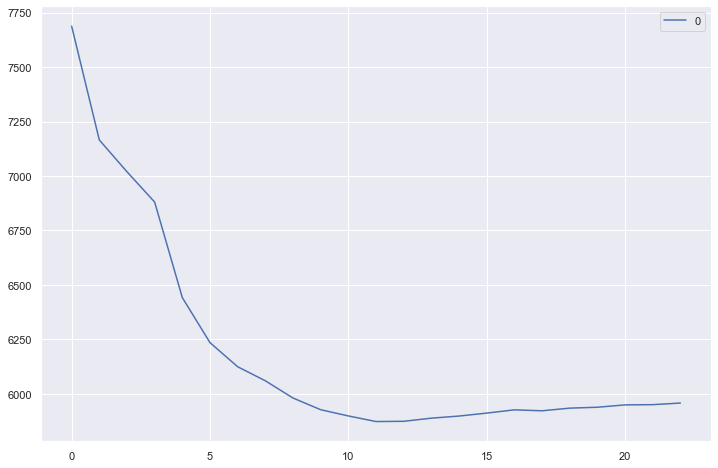

In [121]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Text(0, 0.5, 'Error')

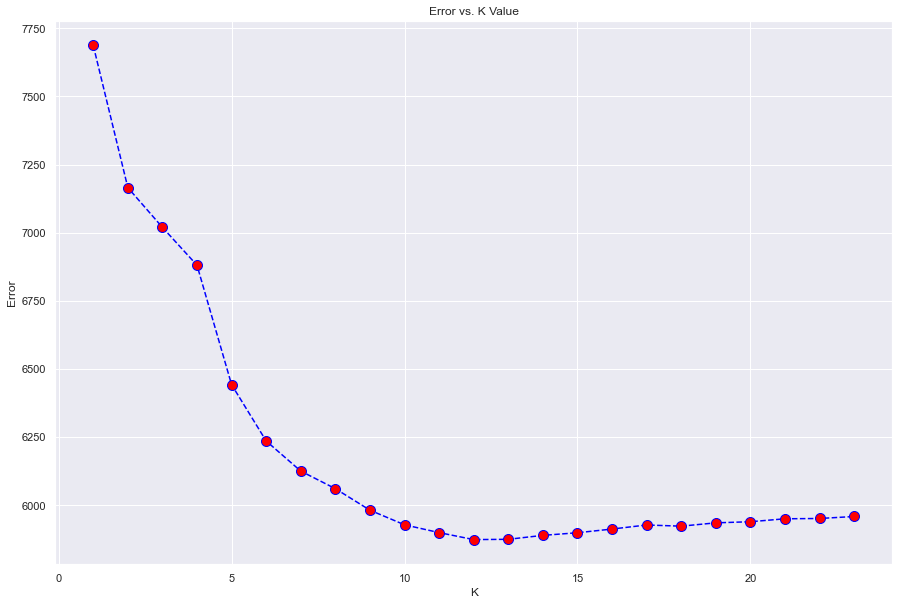

In [122]:
plt.figure(figsize=(15,10))
plt.plot(range(1,24,1),rmse_val,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

K = 13, for knn because we are getting minimum error at 12, but we prefer an odd value.

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn import neighbors

In [124]:
from sklearn import metrics

In [125]:
def get_score(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

In [126]:
def get_score1(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return metrics.r2_score(Y_pred, Y_test)

In [127]:
Lregressor=LinearRegression()
Dregressor=DecisionTreeRegressor(random_state=0)
RFregressor=RandomForestRegressor(random_state=0)
XGB_regressor=xg.XGBRegressor(random_state=0)
KNN_regressor=neighbors.KNeighborsRegressor(n_neighbors = 13)

Linear Regression & DecisionTreeRegressor didn't done well, while XGB regressor, KNN regression done better compare to others.
RandomForestRegressor is in middle

In [128]:
Lregressor.fit(X_train,Y1_train)
Y1_pred = Lregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y1_test, Y1_pred)
mse=metrics.mean_squared_error(Y1_test, Y1_pred)
print('R2 square:',metrics.r2_score(Y1_test, Y1_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.0348031323017991
MAE:  8187.58939793522
MSE:  84523394.49997577


In [129]:
Dregressor.fit(X_train,Y1_train)
Y1_pred = Dregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y1_test, Y1_pred)
mse=metrics.mean_squared_error(Y1_test, Y1_pred)
print('R2 square:',metrics.r2_score(Y1_test, Y1_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.44292245293235777
MAE:  3513.8092411344965
MSE:  48783918.445744574


In [130]:
RFregressor.fit(X_train,Y1_train)
Y1_pred = RFregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y1_test, Y1_pred)
mse=metrics.mean_squared_error(Y1_test, Y1_pred)
print('R2 square:',metrics.r2_score(Y1_test, Y1_pred))
print('MAE: ', mae)
print('MSE: ', mse)

<ipython-input-130-bf7602d0c434>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor.fit(X_train,Y1_train)


R2 square: 0.5789590208904928
MAE:  3415.3139927576835
MSE:  36871040.47778218


In [131]:
XGB_regressor.fit(X_train,Y1_train)
Y1_pred = XGB_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y1_test, Y1_pred)
mse=metrics.mean_squared_error(Y1_test, Y1_pred)
print('R2 square:',metrics.r2_score(Y1_test, Y1_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.6107851731554748
MAE:  3884.866353078763
MSE:  34083987.89469143


In [132]:
KNN_regressor.fit(X_train,Y1_train)
Y1_pred = KNN_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y1_test, Y1_pred)
mse=metrics.mean_squared_error(Y1_test, Y1_pred)
print('R2 square:',metrics.r2_score(Y1_test, Y1_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.6059646795166076
MAE:  3493.9074567037032
MSE:  34506124.04034042


# Target variable number 2 is Average Signal Strength Download

In [133]:
Dataset.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [134]:
Y2 = Dataset.iloc[:,9:10]

In [135]:
Y2.head()

,Average Signal Strength Download
0,-94.86
1,-91.96
2,-85.03
3,-89.39
4,-94.05


In [136]:
Y2 = Y2.values.reshape(-1,1)

In [137]:
Y2

array([[ -94.86 ],
       [ -91.96 ],
       [ -85.03 ],
       ...,
       [-101.   ],
       [ -96.882],
       [ -95.011]])

In [138]:
for train_index, test_index in kf.split(X_scaled,Y2):
    X_train, X_test, Y2_train, Y2_test = X_scaled[train_index], X_scaled[test_index], Y2[train_index], Y2[test_index]

In [139]:
X_train.shape, X_test.shape, Y2_train.shape, Y2_test.shape

((24628, 2), (6157, 2), (24628, 1), (6157, 1))

In [140]:
rmse1_val = []
for K in range(23):
    K = K+1
    knn_r = neighbors.KNeighborsRegressor(n_neighbors = K)
    knn_r.fit(X_train,Y2_train)
    pred=knn_r.predict(X_test)
    error = sqrt(mean_squared_error(Y2_test,pred))
    rmse1_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)    

RMSE value for k=  1 is: 608.4921995055379
RMSE value for k=  2 is: 443.1379478926251
RMSE value for k=  3 is: 386.8114358415046
RMSE value for k=  4 is: 326.6802570859243
RMSE value for k=  5 is: 261.28394599615666
RMSE value for k=  6 is: 217.76776666709605
RMSE value for k=  7 is: 186.64470293121738
RMSE value for k=  8 is: 169.13120378890508
RMSE value for k=  9 is: 151.72989489340407
RMSE value for k=  10 is: 137.72999086471873
RMSE value for k=  11 is: 125.20314156221139
RMSE value for k=  12 is: 114.75534618773557
RMSE value for k=  13 is: 105.89291037385019
RMSE value for k=  14 is: 98.88835998990136
RMSE value for k=  15 is: 92.27591731618922
RMSE value for k=  16 is: 86.47639129748342
RMSE value for k=  17 is: 81.3913926506522
RMSE value for k=  18 is: 77.05722568186359
RMSE value for k=  19 is: 72.97379795193261
RMSE value for k=  20 is: 69.48538055570826
RMSE value for k=  21 is: 66.17711977890029
RMSE value for k=  22 is: 63.881842302643875
RMSE value for k=  23 is: 61.085

Text(0, 0.5, 'Error')

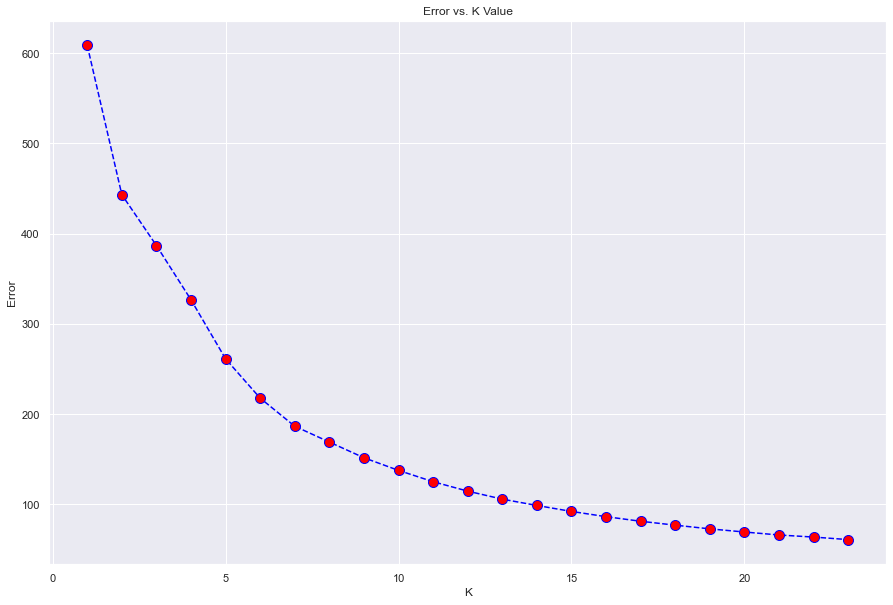

In [141]:
plt.figure(figsize=(15,10))
plt.plot(range(1,24,1),rmse1_val,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

Here error decreasing as K is increasing, So let's go for 15. 

In [142]:
Lregressor=LinearRegression()
Dregressor=DecisionTreeRegressor(random_state=0)
RFregressor=RandomForestRegressor(random_state=0)
XGB_regressor=xg.XGBRegressor(random_state=0)
KNN_regressor=neighbors.KNeighborsRegressor(n_neighbors = 15)

In [143]:
Lregressor.fit(X_train,Y2_train)
Y2_pred = Lregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y2_test, Y2_pred)
mse=metrics.mean_squared_error(Y2_test, Y2_pred)
print('R2 square:',metrics.r2_score(Y2_test, Y2_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: -1.9804460563733923
MAE:  8.820619471825845
MSE:  108.19038031598367


r2 score for perfect model is 1.0
r2 score for a model which predicts mean value is 0.0
r2 score for a worse model is -2.0

In [144]:
Dregressor.fit(X_train,Y2_train)
Y2_pred = Dregressor.predict(X_test)
Y2_pred.reshape(-1,1)
mae=metrics.mean_absolute_error(Y2_test, Y2_pred)
mse=metrics.mean_squared_error(Y2_test, Y2_pred)
print('R2 square:',metrics.r2_score(Y2_test, Y2_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: -4403.993983175622
MAE:  22.312906346850596
MSE:  159901.56014072962


In [145]:
Y2_pred.reshape(-1,1)

array([[-87.83 ],
       [-87.83 ],
       [-87.83 ],
       ...,
       [-92.54 ],
       [-86.8  ],
       [-95.011]])

In [146]:
Y2_test

array([[ -87.83 ],
       [ -87.83 ],
       [ -87.83 ],
       ...,
       [-101.   ],
       [ -96.882],
       [ -95.011]])

In [147]:
RFregressor.fit(X_train,Y2_train)
Y2_pred = RFregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y2_test, Y2_pred)
mse=metrics.mean_squared_error(Y2_test, Y2_pred)
print('R2 square:',metrics.r2_score(Y2_test, Y2_pred))
print('MAE: ', mae)
print('MSE: ', mse)

<ipython-input-147-b42be5cc9fcb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor.fit(X_train,Y2_train)


R2 square: -4125.613138924248
MAE:  34.46957411465748
MSE:  149796.31789088715


In [148]:
XGB_regressor.fit(X_train,Y2_train)
Y2_pred = XGB_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y2_test, Y2_pred)
mse=metrics.mean_squared_error(Y2_test, Y2_pred)
print('R2 square:',metrics.r2_score(Y2_test, Y2_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: -4091.592425734379
MAE:  26.593435676915828
MSE:  148561.36385078228


In [149]:
Y2_pred

array([-87.74584, -88.71524, -88.71524, ..., -91.97623, -87.60942,
       -89.62296], dtype=float32)

In [150]:
KNN_regressor.fit(X_train,Y2_train)
Y2_pred = KNN_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y2_test, Y2_pred)
mse=metrics.mean_squared_error(Y2_test, Y2_pred)
print('R2 square:',metrics.r2_score(Y2_test, Y2_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: -233.5683218602744
MAE:  12.559878127145478
MSE:  8514.844916544189


# Target variable number 3 is Average Data Speed Upload

In [151]:
Y3 = Dataset.iloc[:,10:11]

In [152]:
Y3.head()

,Average Data Speed Upload
0,2591.08
1,4671.48
2,968.58
3,2515.34
4,4968.27


In [153]:
Y3 = Y3.values.reshape(-1,1)

In [154]:
Y3

array([[2591.08],
       [4671.48],
       [ 968.58],
       ...,
       [ 561.  ],
       [2981.59],
       [2788.9 ]])

In [155]:
for train_index, test_index in kf.split(X_scaled,Y3):
    X_train, X_test, Y3_train, Y3_test = X_scaled[train_index], X_scaled[test_index], Y3[train_index], Y3[test_index]

In [156]:
X_train.shape, X_test.shape, Y3_train.shape, Y3_test.shape

((24628, 2), (6157, 2), (24628, 1), (6157, 1))

In [157]:
rmse2_val = []
for K in range(23):
    K = K+1
    knn_r = neighbors.KNeighborsRegressor(n_neighbors = K)
    knn_r.fit(X_train,Y3_train)
    pred=knn_r.predict(X_test)
    error = sqrt(mean_squared_error(Y3_test,pred))
    rmse2_val.append(error)

Text(0, 0.5, 'Error')

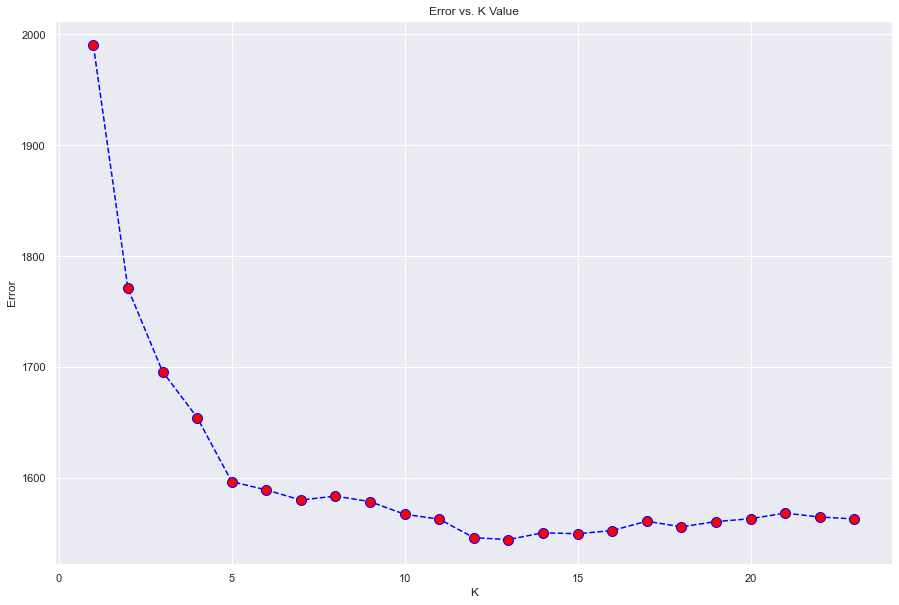

In [158]:
plt.figure(figsize=(15,10))
plt.plot(range(1,24,1),rmse2_val,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

K = 13, as we getting low error

In [159]:
Lregressor=LinearRegression()
Dregressor=DecisionTreeRegressor(random_state=0)
RFregressor=RandomForestRegressor(random_state=0)
XGB_regressor=xg.XGBRegressor(random_state=0)
KNN_regressor=neighbors.KNeighborsRegressor(n_neighbors = 13)

In [160]:
Lregressor.fit(X_train,Y3_train)
Y3_pred = Lregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y3_pred, Y3_test)
mse=metrics.mean_squared_error(Y3_pred, Y3_test)
print('R2 square:',metrics.r2_score(Y3_test, Y3_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.03165054316393334
MAE:  1601.2952512320512
MSE:  3995612.326128623


In [161]:
Dregressor.fit(X_train,Y3_train)
Y3_pred = Dregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y3_pred, Y3_test)
mse=metrics.mean_squared_error(Y3_pred, Y3_test)
print('R2 square:',metrics.r2_score(Y3_test, Y3_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: -0.02928587121858084
MAE:  1077.9078364116772
MSE:  4247048.712753327


In [162]:
RFregressor.fit(X_train,Y3_train)
Y3_pred = RFregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y3_pred, Y3_test)
mse=metrics.mean_squared_error(Y3_pred, Y3_test)
print('R2 square:',metrics.r2_score(Y3_test, Y3_pred))
print('MAE: ', mae)
print('MSE: ', mse)

<ipython-input-162-10199c167620>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor.fit(X_train,Y3_train)


R2 square: 0.3778681005272748
MAE:  955.7333602170418
MSE:  2567046.2955935323


In [163]:
XGB_regressor.fit(X_train,Y3_train)
Y3_pred = XGB_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y3_pred, Y3_test)
mse=metrics.mean_squared_error(Y3_pred, Y3_test)
print('R2 square:',metrics.r2_score(Y3_test, Y3_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.4034563044873122
MAE:  1039.106648999662
MSE:  2461464.015948048


In [164]:
KNN_regressor.fit(X_train,Y3_train)
Y3_pred = KNN_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y3_pred, Y3_test)
mse=metrics.mean_squared_error(Y3_pred, Y3_test)
print('R2 square:',metrics.r2_score(Y3_test, Y3_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.4219825573434658
MAE:  954.5746709353833
MSE:  2385020.8231043364


# Target variable number 4 is Average Signal Strength Upload

In [165]:
Y4 = Dataset.iloc[:,11:12]

In [166]:
Y4

,Average Signal Strength Upload
0,-94.840
1,-91.920
2,-85.470
3,-89.515
4,-94.110
...,...
30780,-73.030
30781,-73.030
30782,-101.000
30783,-96.550


In [167]:
Y4 = Y4.values.reshape(-1,1)

In [168]:
Y4

array([[ -94.84 ],
       [ -91.92 ],
       [ -85.47 ],
       ...,
       [-101.   ],
       [ -96.55 ],
       [ -95.093]])

In [169]:
for train_index, test_index in kf.split(X_scaled,Y4):
    X_train, X_test, Y4_train, Y4_test = X_scaled[train_index], X_scaled[test_index], Y4[train_index], Y4[test_index]

In [170]:
X_train.shape, X_test.shape, Y4_train.shape, Y4_test.shape

((24628, 2), (6157, 2), (24628, 1), (6157, 1))

In [171]:
rmse3_val = []
for K in range(23):
    K = K+1
    knn_r = neighbors.KNeighborsRegressor(n_neighbors = K)
    knn_r.fit(X_train,Y4_train)
    pred=knn_r.predict(X_test)
    error = sqrt(mean_squared_error(pred,Y4_test))
    rmse3_val.append(error)

Text(0, 0.5, 'Error')

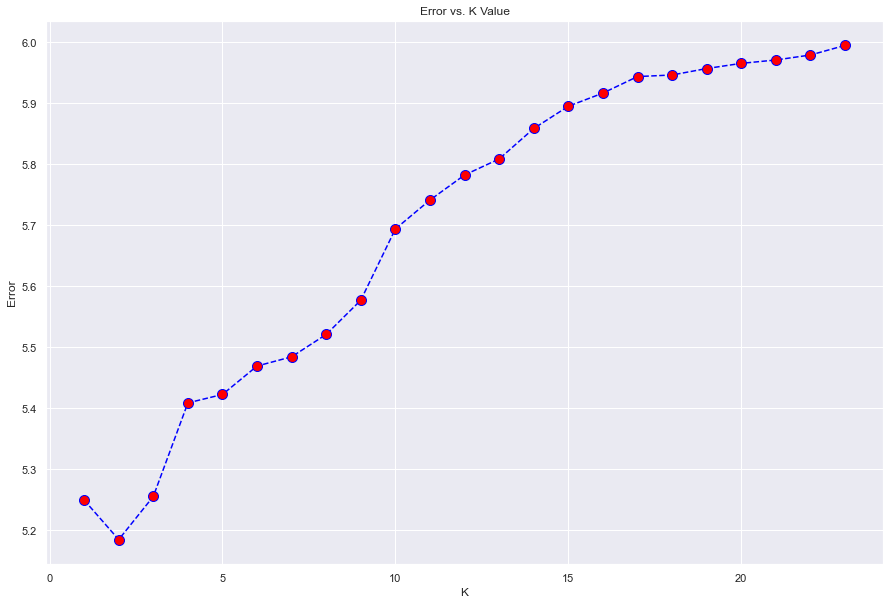

In [172]:
plt.figure(figsize=(15,10))
plt.plot(range(1,24,1),rmse3_val,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

K=5, because slope is not that steep as compared at 3

In [173]:
#Lregressor=LinearRegression()
#Dregressor=DecisionTreeRegressor()
#RFregressor=RandomForestRegressor()
#XGB_regressor=xg.XGBRegressor()
KNN_regressor=neighbors.KNeighborsRegressor(n_neighbors = 5)

In [174]:
Lregressor.fit(X_train,Y4_train)
Y4_pred = Lregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y4_pred, Y4_test)
mse=metrics.mean_squared_error(Y4_pred, Y4_test)
print('R2 square:',metrics.r2_score(Y4_test, Y4_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.006578460129808339
MAE:  4.699561335320046
MSE:  55.30472338884375


In [175]:
Dregressor.fit(X_train,Y4_train)
Y4_pred = Dregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y4_pred, Y4_test)
mse=metrics.mean_squared_error(Y4_pred, Y4_test)
print('R2 square:',metrics.r2_score(Y4_test, Y4_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.14092512968414495
MAE:  2.8218261843424797
MSE:  47.82551632545971


In [176]:
RFregressor.fit(X_train,Y4_train)
Y4_pred = RFregressor.predict(X_test)
mae=metrics.mean_absolute_error(Y4_pred, Y4_test)
mse=metrics.mean_squared_error(Y4_pred, Y4_test)
print('R2 square:',metrics.r2_score(Y4_test, Y4_pred))
print('MAE: ', mae)
print('MSE: ', mse)

<ipython-input-176-57676e484d52>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor.fit(X_train,Y4_train)


R2 square: 0.484370155243235
MAE:  2.627811080577771
MSE:  28.70560461073912


In [177]:
XGB_regressor.fit(X_train,Y4_train)
Y4_pred = XGB_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y4_pred, Y4_test)
mse=metrics.mean_squared_error(Y4_pred, Y4_test)
print('R2 square:',metrics.r2_score(Y4_test, Y4_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.4743955339926329
MAE:  2.8815312217008517
MSE:  29.260901276890646


In [178]:
KNN_regressor.fit(X_train,Y4_train)
Y4_pred = KNN_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y4_pred, Y4_test)
mse=metrics.mean_squared_error(Y4_pred, Y4_test)
print('R2 square:',metrics.r2_score(Y4_test, Y4_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.4718035912024694
MAE:  2.5248443263011207
MSE:  29.40519720092349


# Classification Analysis

In [179]:
Dataset.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


Call Drop Category

In [180]:
Y5 = Dataset.iloc[:,4:5]

In [181]:
Y5.dtypes

Call Drop Category    category
dtype: object

In [182]:
X1 = Dataset.drop('Call Drop Category',axis=1)

In [183]:
X1

,Operator,In Out Travelling,Network Type,Rating,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,Airtel,Indoor,4G,3,12.998502,77.672437,Karnataka,8807.910,-94.860,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,Vodafone,Indoor,4G,1,23.554190,72.620110,Gujarat,6862.552,-91.960,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,Airtel,Indoor,3G,1,11.327329,76.749743,Tamil Nadu,1178.410,-85.030,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,Airtel,Indoor,4G,3,22.279660,73.149369,Gujarat,5694.480,-89.390,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,Airtel,Travelling,4G,3,18.546344,73.819090,Maharashtra,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30780,RJio,Indoor,4G,5,20.342392,85.822995,Odisha,31502.050,-72.990,6895.45,-73.030,45989707.0,73.45,1489.0,155707.0
30781,RJio,Indoor,4G,5,20.342392,85.822995,Odisha,31502.050,-72.990,6895.45,-73.030,45989707.0,73.45,1489.0,155707.0
30782,Idea,Travelling,3G,5,12.986593,77.581266,Karnataka,905.000,-101.000,561.00,-101.000,61130704.0,75.36,1248.0,191791.0
30783,Vodafone,Indoor,4G,1,18.637340,73.768159,Maharashtra,5191.980,-96.882,2981.59,-96.550,112374333.0,82.34,1455.5,307713.0


In [184]:
X1.Operator.value_counts()

RJio        15218
Airtel       6982
Vodafone     5896
Idea         2050
BSNL          639
Name: Operator, dtype: int64

In [185]:
X1.Rating.value_counts()

5    11101
4     7396
1     5439
3     4355
2     2494
Name: Rating, dtype: int64

In [186]:
X1['In Out Travelling'].value_counts()

Indoor        20280
Outdoor        5977
Travelling     4528
Name: In Out Travelling, dtype: int64

In [187]:
X1['Network Type'].value_counts()

4G    24082
3G     6703
Name: Network Type, dtype: int64

In [188]:
X1['State Name'].value_counts()

Maharashtra       10422
Gujarat            2671
Uttar Pradesh      2531
West Bengal        2384
Tamil Nadu         2198
Rajasthan          2164
Karnataka          1967
Odisha             1646
Bihar              1404
Haryana            1304
Madhya Pradesh      872
Andhra Pradesh      809
Punjab              256
Kerala               97
Assam                60
Name: State Name, dtype: int64

In [189]:
Y5['Call Drop Category'].value_counts()

Satisfactory          21327
Poor Voice Quality     6632
Call Dropped           2826
Name: Call Drop Category, dtype: int64

So we have a class imbalance in the output variables

In [190]:
Operator_ohe = pd.get_dummies(X1['Operator'])
Operator_ohe

,Airtel,BSNL,Idea,RJio,Vodafone
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
30780,0,0,0,1,0
30781,0,0,0,1,0
30782,0,0,1,0,0
30783,0,0,0,0,1


In [191]:
InOutTravelling_ohe = pd.get_dummies(X1['In Out Travelling'])
InOutTravelling_ohe

,Indoor,Outdoor,Travelling
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
30780,1,0,0
30781,1,0,0
30782,0,0,1
30783,1,0,0


In [192]:
NetworkType_ohe = pd.get_dummies(X1['Network Type'])
NetworkType_ohe

,3G,4G
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
30780,0,1
30781,0,1
30782,1,0
30783,0,1


In [193]:
labelencoder = LabelEncoder()

In [194]:
X1.iloc[:,6]

0          Karnataka
1            Gujarat
2         Tamil Nadu
3            Gujarat
4        Maharashtra
            ...     
30780         Odisha
30781         Odisha
30782      Karnataka
30783    Maharashtra
30784     Tamil Nadu
Name: State Name, Length: 30785, dtype: category
Categories (15, object): ['Andhra Pradesh', 'Assam', 'Bihar', 'Gujarat', ..., 'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal']

In [195]:
statename_encoder = labelencoder.fit_transform(X1.iloc[:,6])

In [196]:
statename_encoder

array([ 5,  3, 12, ...,  5,  8, 12])

In [197]:
statename_encoder = statename_encoder.reshape(-1,1)

In [198]:
statename_encoder

array([[ 5],
       [ 3],
       [12],
       ...,
       [ 5],
       [ 8],
       [12]])

In [199]:
statename_encoder = pd.DataFrame(statename_encoder, columns=['State_Name'])

In [200]:
statename_encoder

,State_Name
0,5
1,3
2,12
3,3
4,8
...,...
30780,9
30781,9
30782,5
30783,8


In [201]:
statename_encoder.value_counts()

State_Name
8             10422
3              2671
13             2531
14             2384
12             2198
11             2164
5              1967
9              1646
2              1404
4              1304
7               872
0               809
10              256
6                97
1                60
dtype: int64

Maharashtra       10422    = 8
Gujarat            2671    = 3
Uttar Pradesh      2531    = 13
West Bengal        2384    = 14
Tamil Nadu         2198    = 12
Rajasthan          2164    = 11
Karnataka          1967    = 5
Odisha             1646    = 9
Bihar              1404    = 2
Haryana            1304    = 4
Madhya Pradesh      872    = 7
Andhra Pradesh      809    = 0
Punjab              256    = 10
Kerala               97    = 6
Assam                60    = 1

In [202]:
statename_encoder.dtypes

State_Name    int32
dtype: object

In [203]:
statename_encoder = statename_encoder.astype('category')

In [204]:
statename_encoder.dtypes

State_Name    category
dtype: object

In [205]:
Y5.iloc[:,0]

0              Satisfactory
1              Call Dropped
2              Call Dropped
3              Satisfactory
4              Satisfactory
                ...        
30780          Satisfactory
30781          Satisfactory
30782          Satisfactory
30783    Poor Voice Quality
30784          Satisfactory
Name: Call Drop Category, Length: 30785, dtype: category
Categories (3, object): ['Call Dropped', 'Poor Voice Quality', 'Satisfactory']

In [206]:
CallDropCategory_encoder = labelencoder.fit_transform(Y5.iloc[:,0])

In [207]:
CallDropCategory_encoder

array([2, 0, 0, ..., 2, 1, 2])

In [208]:
CallDropCategory_encoder = CallDropCategory_encoder.reshape(-1,1)

In [209]:
CallDropCategory_encoder

array([[2],
       [0],
       [0],
       ...,
       [2],
       [1],
       [2]])

In [210]:
Y5 = pd.DataFrame(CallDropCategory_encoder, columns=['Call_Drop_Category'])

In [211]:
Y5.value_counts()

Call_Drop_Category
2                     21327
1                      6632
0                      2826
dtype: int64

Satisfactory          21327  = 2
Poor Voice Quality     6632  = 1
Call Dropped           2826  = 0

In [212]:
#categorical_variables_df.shape
#continuous_variables_df.head(10)
num_cols

['Latitude',
 'Longitude',
 'Average Data Speed Download',
 'Average Signal Strength Download',
 'Average Data Speed Upload',
 'Average Signal Strength Upload',
 'Population',
 'Literacy Rate',
 'Rainfall',
 'Area of the state']

In [213]:
continuous_variables_df.head(10)

,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,12.998502,77.672437,8807.910,-94.860,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,23.554190,72.620110,6862.552,-91.960,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,11.327329,76.749743,1178.410,-85.030,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,22.279660,73.149369,5694.480,-89.390,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,18.546344,73.819090,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
5,18.546627,73.819532,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
6,18.547528,73.819105,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
7,18.547528,73.819105,10804.560,-94.050,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0
8,10.583104,77.263595,7914.680,-95.011,2788.90,-95.093,72147030.0,80.33,998.0,130060.0
9,29.672815,77.007663,7170.630,-94.578,2680.02,-94.650,25351462.0,75.55,617.0,44212.0


In [214]:
continuous_variables_df_scaled = scaler.fit_transform(continuous_variables_df)

In [215]:
continuous_variables_df_scaled.shape

(30785, 10)

In [216]:
continuous_variables_df_scaled = pd.DataFrame(continuous_variables_df_scaled, columns=['Latitude',
 'Longitude',
 'Average_Data_Speed_Download',
 'Average_Signal_Strength_Download',
 'Average_Data_Speed_Upload',
 'Average_Signal_Strength_Upload',
 'Population',
 'Literacy_Rate',
 'Rainfall',
 'Area_of_the_state'])

In [217]:
continuous_variables_df_scaled

,Latitude,Longitude,Average_Data_Speed_Download,Average_Signal_Strength_Download,Average_Data_Speed_Upload,Average_Signal_Strength_Upload,Population,Literacy_Rate,Rainfall,Area_of_the_state
0,-1.628683,0.009791,-0.474010,-0.015390,-0.666041,-0.933559,-0.784760,0.067972,0.055441,-0.322333
1,0.523471,-1.021803,-0.675554,-0.000104,0.362853,-0.554166,-0.801562,0.282449,-0.819964,-0.276838
2,-1.969411,-0.178606,-1.264447,0.036426,-1.468474,0.283877,-0.516893,0.467203,-0.484266,-0.985799
3,0.263613,-0.913738,-0.796570,0.013444,-0.703500,-0.241686,-0.801562,0.282449,-0.819964,-0.276838
4,-0.497557,-0.776993,-0.267152,-0.011121,0.509635,-0.838711,0.461249,0.628663,0.503398,0.923559
...,...,...,...,...,...,...,...,...,...,...
30780,-0.131369,1.673989,1.877163,0.099893,1.462751,1.900196,-1.152919,-0.085454,0.575719,-0.710153
30781,-0.131369,1.673989,1.877163,0.099893,1.462751,1.900196,-1.152919,-0.085454,0.575719,-0.710153
30782,-1.631111,-0.008824,-1.292773,-0.047756,-1.670049,-1.733923,-0.784760,0.067972,0.055441,-0.322333
30783,-0.479004,-0.787392,-0.848630,-0.026049,-0.472909,-1.155738,0.461249,0.628663,0.503398,0.923559


In [218]:
X11 = pd.concat([Operator_ohe,InOutTravelling_ohe,NetworkType_ohe,statename_encoder,continuous_variables_df_scaled],axis=1)

In [219]:
X11

,Airtel,BSNL,Idea,RJio,Vodafone,Indoor,Outdoor,Travelling,3G,4G,...,Latitude,Longitude,Average_Data_Speed_Download,Average_Signal_Strength_Download,Average_Data_Speed_Upload,Average_Signal_Strength_Upload,Population,Literacy_Rate,Rainfall,Area_of_the_state
0,1,0,0,0,0,1,0,0,0,1,...,-1.628683,0.009791,-0.474010,-0.015390,-0.666041,-0.933559,-0.784760,0.067972,0.055441,-0.322333
1,0,0,0,0,1,1,0,0,0,1,...,0.523471,-1.021803,-0.675554,-0.000104,0.362853,-0.554166,-0.801562,0.282449,-0.819964,-0.276838
2,1,0,0,0,0,1,0,0,1,0,...,-1.969411,-0.178606,-1.264447,0.036426,-1.468474,0.283877,-0.516893,0.467203,-0.484266,-0.985799
3,1,0,0,0,0,1,0,0,0,1,...,0.263613,-0.913738,-0.796570,0.013444,-0.703500,-0.241686,-0.801562,0.282449,-0.819964,-0.276838
4,1,0,0,0,0,0,0,1,0,1,...,-0.497557,-0.776993,-0.267152,-0.011121,0.509635,-0.838711,0.461249,0.628663,0.503398,0.923559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30780,0,0,0,1,0,1,0,0,0,1,...,-0.131369,1.673989,1.877163,0.099893,1.462751,1.900196,-1.152919,-0.085454,0.575719,-0.710153
30781,0,0,0,1,0,1,0,0,0,1,...,-0.131369,1.673989,1.877163,0.099893,1.462751,1.900196,-1.152919,-0.085454,0.575719,-0.710153
30782,0,0,1,0,0,0,0,1,1,0,...,-1.631111,-0.008824,-1.292773,-0.047756,-1.670049,-1.733923,-0.784760,0.067972,0.055441,-0.322333
30783,0,0,0,0,1,1,0,0,0,1,...,-0.479004,-0.787392,-0.848630,-0.026049,-0.472909,-1.155738,0.461249,0.628663,0.503398,0.923559


In [220]:
Rating = X1.iloc[:,3:4]

In [221]:
Rating

,Rating
0,3
1,1
2,1
3,3
4,3
...,...
30780,5
30781,5
30782,5
30783,1


In [222]:
X11 = pd.concat([Rating,X11],axis=1)

In [223]:
X11.dtypes

Rating                              category
Airtel                                 uint8
BSNL                                   uint8
Idea                                   uint8
RJio                                   uint8
Vodafone                               uint8
Indoor                                 uint8
Outdoor                                uint8
Travelling                             uint8
3G                                     uint8
4G                                     uint8
State_Name                          category
Latitude                             float64
Longitude                            float64
Average_Data_Speed_Download          float64
Average_Signal_Strength_Download     float64
Average_Data_Speed_Upload            float64
Average_Signal_Strength_Upload       float64
Population                           float64
Literacy_Rate                        float64
Rainfall                             float64
Area_of_the_state                    float64
dtype: obj

In [224]:
Y5

,Call_Drop_Category
0,2
1,0
2,0
3,2
4,2
...,...
30780,2
30781,2
30782,2
30783,1


In [225]:
Y5 = Y5.astype('category')

In [226]:
Y5.dtypes

Call_Drop_Category    category
dtype: object

Random Forest, KNN classifier, GaussianNB, DecisionTreeClassifier,XGBClassifier

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

In [228]:
#values.reshape(-1,1)
X11_array = X11.to_numpy() 
X11_array.shape

(30785, 22)

In [229]:
Y5_array = Y5.to_numpy() 
Y5_array.shape

(30785, 1)

In [230]:
for train_index, test_index in skf.split(X11_array,Y5_array):
    X11_train, X11_test, Y5_train, Y5_test = X11_array[train_index], X11_array[test_index], Y5_array[train_index], Y5_array[test_index]

In [231]:
X11_train.shape, X11_test.shape, Y5_train.shape, Y5_test.shape

((24628, 22), (6157, 22), (24628, 1), (6157, 1))

In [232]:
error_rate = []
# Will take some time
for i in range(1,20):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X11_train,Y5_train)
 pred_i = knn.predict(X11_test)
 error_rate.append(np.mean(pred_i != Y5_test))

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

Text(0, 0.5, 'Error Rate')

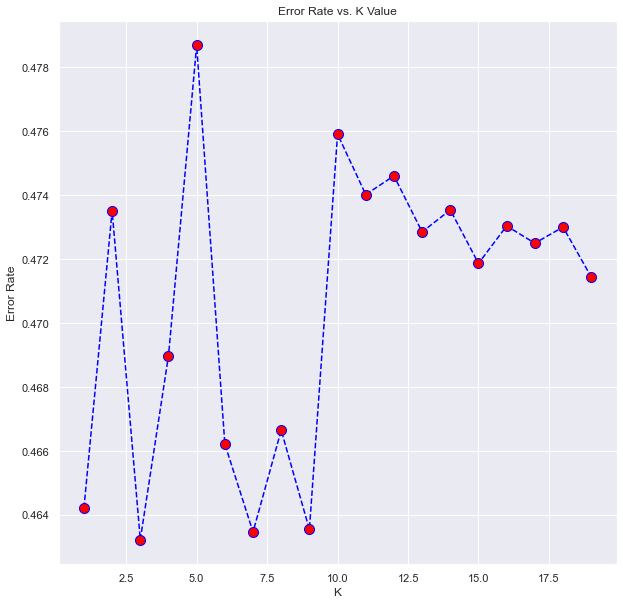

In [233]:
plt.figure(figsize=(10,10))
plt.plot(range(1,20,1),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

K = 3, minimum value

In [234]:
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [235]:
scores_RF = []
scores_DT = []
scores_GNB = []
scores_KNNC = []
scores_XGBC = []

In [236]:
RF = RandomForestClassifier(random_state=0)
DT = DecisionTreeClassifier(random_state=0)
GNB = GaussianNB()
KNNC = KNeighborsClassifier(n_neighbors=3)
XGBC = xg.XGBClassifier(random_state=0)

In [237]:
X11_array.shape,Y5_array.shape

((30785, 22), (30785, 1))

In [238]:
for train_index, test_index in skf.split(X11_array,Y5_array):
    X11_train,X11_test,Y5_train,Y5_test = X11_array[train_index], X11_array[test_index], Y5_array[train_index], Y5_array[test_index]
    scores_RF.append(get_score(RF,X11_train,X11_test,Y5_train,Y5_test))
    scores_DT.append(get_score(DT,X11_train,X11_test,Y5_train,Y5_test))
    scores_GNB.append(get_score(GNB,X11_train,X11_test,Y5_train,Y5_test))
    scores_KNNC.append(get_score(KNNC,X11_train,X11_test,Y5_train,Y5_test))
    scores_XGBC.append(get_score(XGBC,X11_train,X11_test,Y5_train,Y5_test))

<ipython-input-125-fbb6b1516cae>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future

[00:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-125-fbb6b1516cae>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future

[00:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-125-fbb6b1516cae>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future

[00:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-125-fbb6b1516cae>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future

[00:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-125-fbb6b1516cae>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future

[00:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [239]:
scores_RF

[0.9165177846353744,
 0.9027123599155433,
 0.90514861133669,
 0.9137566996914082,
 0.8971901900276108]

In [240]:
scores_DT

[0.9101835309403931,
 0.8967029397433816,
 0.8980022738346597,
 0.9079096962806562,
 0.8850089329218775]

In [241]:
scores_GNB

[0.8746142601916518,
 0.8158193925613123,
 0.7895078772129284,
 0.8577229170050349,
 0.8102972226733799]

In [242]:
scores_KNNC

[0.9173298684424233,
 0.9038492772454118,
 0.9092090303719343,
 0.911645281793081,
 0.9217151210004872]

In [243]:
scores_XGBC

[0.9309728764008446,
 0.9070976124736073,
 0.9043365275296411,
 0.9243137891830437,
 0.9166802013967842]

RF,KNNC & XGBC are doing bit better comapre to others.

We can also do cross_val_score, it's a short way, let's try to change some hyperparameters of RF

In [244]:
cross_val_score(RF, X11_array, Y5_array,cv=5)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\vivek\appdata\local\programs\pytho

array([0.91651778, 0.90271236, 0.90514861, 0.9137567 , 0.89719019])

In [245]:
scoRF = cross_val_score(RandomForestClassifier(criterion = "entropy",min_samples_split=50,oob_score=True,max_depth=30,random_state=0),X11_array, Y5_array, cv=5)
np.average(scoRF)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\vivek\appdata\local\programs\pytho

0.9166477180445021

roc_auc_score(y_test, y_pred)

In [246]:
scoXGBC = cross_val_score(xg.XGBClassifier(random_state=0),X11_array, Y5_array, cv=5)
np.average(scoXGBC)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:12:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9166802013967843

Random Forest
X11_train,X11_test,Y5_train,Y5_test

In [247]:
modelRF = RandomForestClassifier(criterion = "entropy",min_samples_split=50,oob_score=True,max_depth=30,random_state=0)

In [248]:
modelRF.fit(X11_train,Y5_train)

<ipython-input-248-c66cdcc5aeb2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(X11_train,Y5_train)


RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_split=50,
                       oob_score=True, random_state=0)

In [249]:
Y_pred = modelRF.predict(X11_test)

In [250]:
print('Test performance')
print(classification_report(Y5_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Confusion matrix')
print(confusion_matrix(Y5_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Precision')
print(precision_score(Y5_test, Y_pred,average=None))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Recall')
print(recall_score(Y5_test, Y_pred,average=None))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('F1-score')
print(f1_score(Y5_test, Y_pred,average=None))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy')
print(accuracy_score(Y5_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Matthews correlation coefficient')
print(matthews_corrcoef(Y5_test,Y_pred))


Test performance
              precision    recall  f1-score   support

           0       0.78      0.50      0.61       565
           1       0.80      0.88      0.84      1327
           2       0.98      0.99      0.98      4265

    accuracy                           0.92      6157
   macro avg       0.85      0.79      0.81      6157
weighted avg       0.92      0.92      0.92      6157

-------------------------------------------------------
-------------------------------------------------------
Confusion matrix
[[ 283  267   15]
 [  79 1164   84]
 [   0   30 4235]]
-------------------------------------------------------
-------------------------------------------------------
Precision
[0.78176796 0.79671458 0.97715736]
-------------------------------------------------------
-------------------------------------------------------
Recall
[0.50088496 0.87716654 0.992966  ]
-------------------------------------------------------
---------------------------------------------------

In [251]:
importance = modelRF.feature_importances_

In [252]:
importance

array([6.90174679e-01, 1.10857866e-02, 5.03269830e-04, 2.70326823e-03,
       4.30236122e-03, 5.75041241e-03, 6.46423791e-03, 5.33229263e-03,
       3.83437692e-03, 1.48292428e-03, 8.86709872e-04, 1.05004427e-02,
       7.80787443e-02, 7.83700893e-02, 1.68898801e-02, 1.25551721e-02,
       1.46905198e-02, 1.17918065e-02, 1.00700111e-02, 1.02860112e-02,
       1.29788589e-02, 1.12681447e-02])

In [253]:
sorted_indices = np.argsort(importance)[::-1]
print(sorted_indices)

[ 0 13 12 14 16 20 15 17 21  1 11 19 18  6  5  7  4  8  3  9 10  2]


In [254]:
importance[sorted_indices]

array([6.90174679e-01, 7.83700893e-02, 7.80787443e-02, 1.68898801e-02,
       1.46905198e-02, 1.29788589e-02, 1.25551721e-02, 1.17918065e-02,
       1.12681447e-02, 1.10857866e-02, 1.05004427e-02, 1.02860112e-02,
       1.00700111e-02, 6.46423791e-03, 5.75041241e-03, 5.33229263e-03,
       4.30236122e-03, 3.83437692e-03, 2.70326823e-03, 1.48292428e-03,
       8.86709872e-04, 5.03269830e-04])

In [255]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.69017
Feature: 1, Score: 0.01109
Feature: 2, Score: 0.00050
Feature: 3, Score: 0.00270
Feature: 4, Score: 0.00430
Feature: 5, Score: 0.00575
Feature: 6, Score: 0.00646
Feature: 7, Score: 0.00533
Feature: 8, Score: 0.00383
Feature: 9, Score: 0.00148
Feature: 10, Score: 0.00089
Feature: 11, Score: 0.01050
Feature: 12, Score: 0.07808
Feature: 13, Score: 0.07837
Feature: 14, Score: 0.01689
Feature: 15, Score: 0.01256
Feature: 16, Score: 0.01469
Feature: 17, Score: 0.01179
Feature: 18, Score: 0.01007
Feature: 19, Score: 0.01029
Feature: 20, Score: 0.01298
Feature: 21, Score: 0.01127


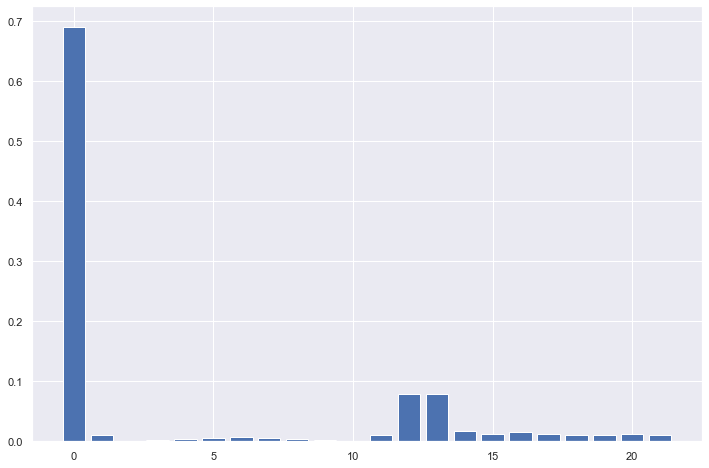

In [256]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

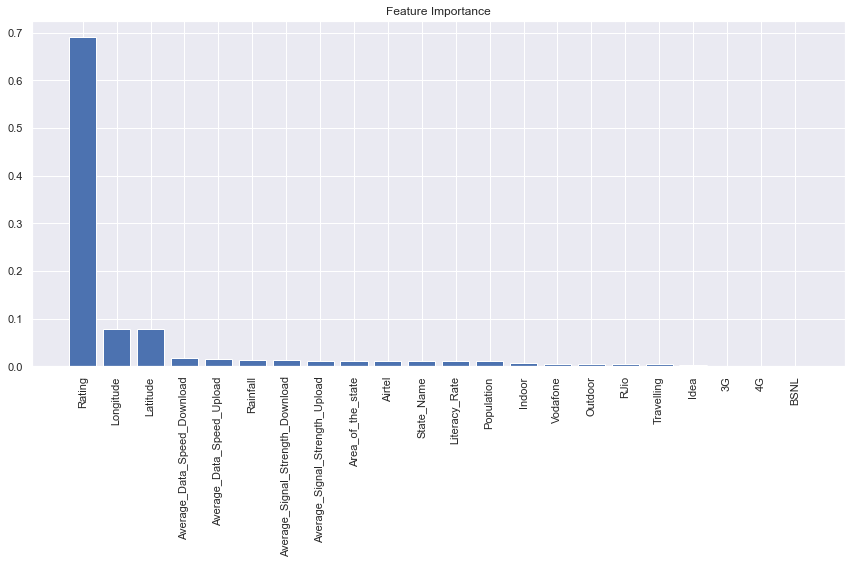

In [257]:
plt.title('Feature Importance')
plt.bar(range(X11_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X11_train.shape[1]), X11.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [258]:
results = permutation_importance(modelRF, X11_train, Y5_train,random_state=0)

In [259]:
importance1 = results.importances_mean

In [260]:
importance1

array([3.62920253e-01, 3.26457690e-03, 0.00000000e+00, 3.49196037e-04,
       1.91651778e-03, 1.88403443e-03, 3.51632288e-03, 2.01396784e-03,
       8.44567159e-04, 6.98392074e-04, 4.62887770e-04, 2.45249310e-03,
       2.24459964e-02, 2.07974663e-02, 3.91424395e-03, 2.17638460e-03,
       4.92934871e-03, 2.73672243e-03, 1.90839695e-03, 1.94900114e-03,
       3.54068540e-03, 2.42000975e-03])

In [261]:
sorted_indices = np.argsort(importance1)[::-1]
print(sorted_indices)

[ 0 12 13 16 14 20  6  1 17 11 21 15  7 19  4 18  5  8  9 10  3  2]


In [262]:
importance1[sorted_indices]

array([3.62920253e-01, 2.24459964e-02, 2.07974663e-02, 4.92934871e-03,
       3.91424395e-03, 3.54068540e-03, 3.51632288e-03, 3.26457690e-03,
       2.73672243e-03, 2.45249310e-03, 2.42000975e-03, 2.17638460e-03,
       2.01396784e-03, 1.94900114e-03, 1.91651778e-03, 1.90839695e-03,
       1.88403443e-03, 8.44567159e-04, 6.98392074e-04, 4.62887770e-04,
       3.49196037e-04, 0.00000000e+00])

In [263]:
for i,v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.36292
Feature: 1, Score: 0.00326
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00035
Feature: 4, Score: 0.00192
Feature: 5, Score: 0.00188
Feature: 6, Score: 0.00352
Feature: 7, Score: 0.00201
Feature: 8, Score: 0.00084
Feature: 9, Score: 0.00070
Feature: 10, Score: 0.00046
Feature: 11, Score: 0.00245
Feature: 12, Score: 0.02245
Feature: 13, Score: 0.02080
Feature: 14, Score: 0.00391
Feature: 15, Score: 0.00218
Feature: 16, Score: 0.00493
Feature: 17, Score: 0.00274
Feature: 18, Score: 0.00191
Feature: 19, Score: 0.00195
Feature: 20, Score: 0.00354
Feature: 21, Score: 0.00242


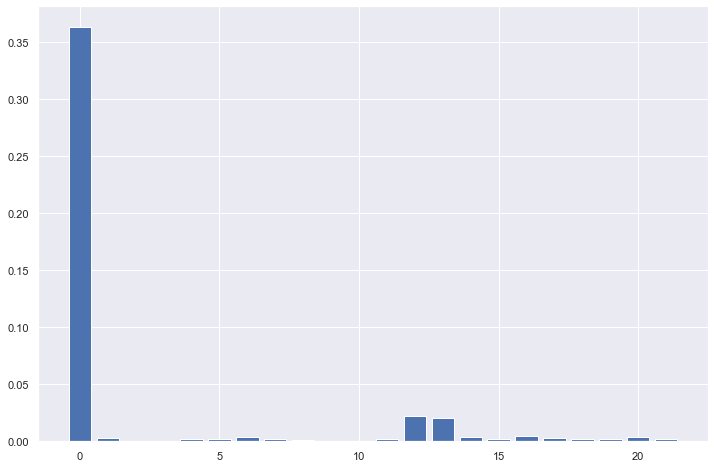

In [264]:
plt.bar([x for x in range(len(importance1))], importance1)
plt.show()

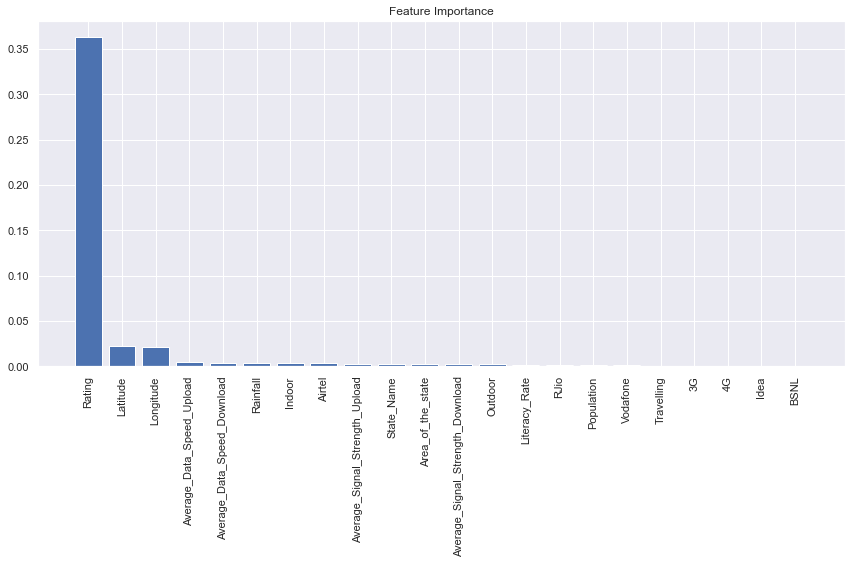

In [265]:
plt.title('Feature Importance')
plt.bar(range(X11_train.shape[1]), importance1[sorted_indices], align='center')
plt.xticks(range(X11_train.shape[1]), X11.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Network Type

In [266]:
continuous_variables_df_scaled

,Latitude,Longitude,Average_Data_Speed_Download,Average_Signal_Strength_Download,Average_Data_Speed_Upload,Average_Signal_Strength_Upload,Population,Literacy_Rate,Rainfall,Area_of_the_state
0,-1.628683,0.009791,-0.474010,-0.015390,-0.666041,-0.933559,-0.784760,0.067972,0.055441,-0.322333
1,0.523471,-1.021803,-0.675554,-0.000104,0.362853,-0.554166,-0.801562,0.282449,-0.819964,-0.276838
2,-1.969411,-0.178606,-1.264447,0.036426,-1.468474,0.283877,-0.516893,0.467203,-0.484266,-0.985799
3,0.263613,-0.913738,-0.796570,0.013444,-0.703500,-0.241686,-0.801562,0.282449,-0.819964,-0.276838
4,-0.497557,-0.776993,-0.267152,-0.011121,0.509635,-0.838711,0.461249,0.628663,0.503398,0.923559
...,...,...,...,...,...,...,...,...,...,...
30780,-0.131369,1.673989,1.877163,0.099893,1.462751,1.900196,-1.152919,-0.085454,0.575719,-0.710153
30781,-0.131369,1.673989,1.877163,0.099893,1.462751,1.900196,-1.152919,-0.085454,0.575719,-0.710153
30782,-1.631111,-0.008824,-1.292773,-0.047756,-1.670049,-1.733923,-0.784760,0.067972,0.055441,-0.322333
30783,-0.479004,-0.787392,-0.848630,-0.026049,-0.472909,-1.155738,0.461249,0.628663,0.503398,0.923559


In [267]:
Operator_ohe

,Airtel,BSNL,Idea,RJio,Vodafone
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
30780,0,0,0,1,0
30781,0,0,0,1,0
30782,0,0,1,0,0
30783,0,0,0,0,1


In [268]:
InOutTravelling_ohe

,Indoor,Outdoor,Travelling
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
30780,1,0,0
30781,1,0,0
30782,0,0,1
30783,1,0,0


In [269]:
statename_encoder

,State_Name
0,5
1,3
2,12
3,3
4,8
...,...
30780,9
30781,9
30782,5
30783,8


In [270]:
Rating

,Rating
0,3
1,1
2,1
3,3
4,3
...,...
30780,5
30781,5
30782,5
30783,1


In [271]:
CallDropCategory_ohe = pd.get_dummies(Dataset['Call Drop Category'])
CallDropCategory_ohe

,Call Dropped,Poor Voice Quality,Satisfactory
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
30780,0,0,1
30781,0,0,1
30782,0,0,1
30783,0,1,0


In [272]:
NetworkType_ohe

,3G,4G
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
30780,0,1
30781,0,1
30782,1,0
30783,0,1


In [273]:
X2 = pd.concat([Operator_ohe, InOutTravelling_ohe, statename_encoder, CallDropCategory_ohe, Rating, continuous_variables_df_scaled],axis=1)

In [274]:
X2

,Airtel,BSNL,Idea,RJio,Vodafone,Indoor,Outdoor,Travelling,State_Name,Call Dropped,...,Latitude,Longitude,Average_Data_Speed_Download,Average_Signal_Strength_Download,Average_Data_Speed_Upload,Average_Signal_Strength_Upload,Population,Literacy_Rate,Rainfall,Area_of_the_state
0,1,0,0,0,0,1,0,0,5,0,...,-1.628683,0.009791,-0.474010,-0.015390,-0.666041,-0.933559,-0.784760,0.067972,0.055441,-0.322333
1,0,0,0,0,1,1,0,0,3,1,...,0.523471,-1.021803,-0.675554,-0.000104,0.362853,-0.554166,-0.801562,0.282449,-0.819964,-0.276838
2,1,0,0,0,0,1,0,0,12,1,...,-1.969411,-0.178606,-1.264447,0.036426,-1.468474,0.283877,-0.516893,0.467203,-0.484266,-0.985799
3,1,0,0,0,0,1,0,0,3,0,...,0.263613,-0.913738,-0.796570,0.013444,-0.703500,-0.241686,-0.801562,0.282449,-0.819964,-0.276838
4,1,0,0,0,0,0,0,1,8,0,...,-0.497557,-0.776993,-0.267152,-0.011121,0.509635,-0.838711,0.461249,0.628663,0.503398,0.923559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30780,0,0,0,1,0,1,0,0,9,0,...,-0.131369,1.673989,1.877163,0.099893,1.462751,1.900196,-1.152919,-0.085454,0.575719,-0.710153
30781,0,0,0,1,0,1,0,0,9,0,...,-0.131369,1.673989,1.877163,0.099893,1.462751,1.900196,-1.152919,-0.085454,0.575719,-0.710153
30782,0,0,1,0,0,0,0,1,5,0,...,-1.631111,-0.008824,-1.292773,-0.047756,-1.670049,-1.733923,-0.784760,0.067972,0.055441,-0.322333
30783,0,0,0,0,1,1,0,0,8,0,...,-0.479004,-0.787392,-0.848630,-0.026049,-0.472909,-1.155738,0.461249,0.628663,0.503398,0.923559


In [275]:
Y6 = NetworkType_ohe.iloc[:,1:]

In [276]:
Y6

,4G
0,1
1,1
2,0
3,1
4,1
...,...
30780,1
30781,1
30782,0
30783,1


We have choosen 4g network type column in that 1 represent 4g and 0 represent 3g

In [277]:
Y6 = Y6.astype('category')

In [278]:
Y6.dtypes

4G    category
dtype: object

In [279]:
Y6.value_counts()

4G
1     24082
0      6703
dtype: int64

# Under/Oversampling & class weights

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Most machine learning algorithms assume that the data is evenly distributed within classes. In the case of class imbalance problems, the extensive issue is that the algorithm will be more biased towards predicting the majority class & have high accuracy.

So, our model will be accurate but not at all serving any value to our problem statement. That is why we can use f1 score as the evaluation metric. F1 score is nothing but the harmonic mean of precision and recall. However, the evaluation metric is chosen based on the business problem and what type of error we want to reduce. But, the f1 score is the go-to metric when it comes to class imbalance problems.

f1 score = 2*(precision*recall)/(precision+recall)

Resampling (Oversampling and Undersampling) : oversample the minority class using replacement. This technique is called oversampling. Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling. After sampling the data we can get a balanced dataset for both majority and minority classes. So, when both classes have a similar number of records present in the dataset, we can assume that the classifier will give equal importance to both classes.

Most of the sklearn classifier modeling libraries and even some boosting based libraries have an in-built parameter “class_weight” which helps us optimize the scoring for the minority class. By default, the value of class_weight=None, i.e. both the classes have been given equal weights. Other than that, we can either give it as ‘balanced’ or we can pass a dictionary that contains manual weights for classes. When the class_weights = ‘balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies.

 wj=n_samples / (n_classes * n_samplesj)
 
wj is the weight for each class(j signifies the class)
n_samplesis the total number of samples or rows in the dataset
n_classesis the total number of unique classes in the target
n_samplesjis the total number of rows of the respective class

In [280]:
Y7 = Y6.copy()

In [281]:
Y7.value_counts()
# imbalance data detected let's solve this issue

4G
1     24082
0      6703
dtype: int64

In [282]:
from sklearn.utils import resample

In [283]:
Y7_majority = Y7[(Y7['4G']==1)] 
Y7_minority = Y7[(Y7['4G']==0)] 

In [284]:
print(Y7_majority.value_counts())
print('------------------------------------')
print(Y7_minority.value_counts())

4G
1     24082
0         0
dtype: int64
------------------------------------
4G
0     6703
1        0
dtype: int64


In [285]:
# Oversampling
Y7_minority_upsampled = resample(Y7_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 24082, # to match majority class
                                 random_state=100)  # reproducible results

In [286]:
Y7_minority_upsampled.value_counts()

4G
0     24082
1         0
dtype: int64

In [287]:
# Combine majority class with upsampled minority class
Y7_upsampled = pd.concat([Y7_minority_upsampled, Y7_majority])

In [288]:
Y7_upsampled.value_counts()

4G
0     24082
1     24082
dtype: int64

In [289]:
# Undersampling
Y7_majority_downsampled = resample(Y7_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 6703, # to match majority class
                                 random_state=100)  # reproducible results

In [290]:
Y7_majority_downsampled.value_counts()

4G
1     6703
0        0
dtype: int64

In [291]:
# Combine minority class with downsampled majority class
Y7_downsampled = pd.concat([Y7_majority_downsampled, Y7_minority])

In [292]:
Y7_downsampled.value_counts()

4G
0     6703
1     6703
dtype: int64

In [293]:
#class weights

In [294]:
classweight_1 = ((24082+6703)/(2*24082))
print(classweight_1)

0.6391703346898098


In [295]:
classweight_0 = ((24082+6703)/(2*6703))
print(classweight_0)

2.2963598388781143


Random Forest, KNN classifier, GaussianNB, DecisionTreeClassifier,XGBClassifier, Logistic regression 

In [296]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
#import xgboost as xg
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [297]:
X2_array = X2.to_numpy() 
X2_array.shape

(30785, 23)

In [298]:
Y6_array = Y6.to_numpy() 
Y6_array.shape

(30785, 1)

In [299]:
for train_index, test_index in skf.split(X2_array,Y6_array):
    X2_train, X2_test, Y6_train, Y6_test = X2_array[train_index], X2_array[test_index], Y6_array[train_index], Y6_array[test_index]

In [300]:
X2_train.shape, X2_test.shape, Y6_train.shape, Y6_test.shape

((24628, 23), (6157, 23), (24628, 1), (6157, 1))

In [301]:
error_rate = []
# Will take some time
for i in range(1,20):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X2_train,Y6_train)
 pred_i = knn.predict(X2_test)
 error_rate.append(np.mean(pred_i != Y6_test))

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

Text(0, 0.5, 'Error Rate')

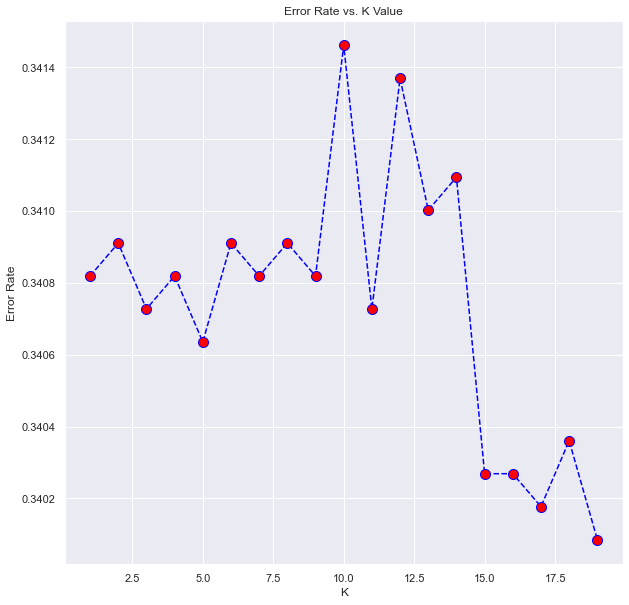

In [302]:
plt.figure(figsize=(10,10))
plt.plot(range(1,20,1),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

K= 19

In [303]:
RF = RandomForestClassifier(random_state=0)
DT = DecisionTreeClassifier(random_state=0)
GNB = GaussianNB()
KNNC = KNeighborsClassifier(n_neighbors=19)
XGBC = xg.XGBClassifier(random_state=0)
LRC = LogisticRegression(random_state=0)
SVMC = SVC(random_state=0)

In [304]:
scores_RF = []
scores_DT = []
scores_GNB = []
scores_KNNC = []
scores_XGBC = []
scores_LRC = []
scores_SVMC = []

In [305]:
X2_array.shape,Y6_array.shape

((30785, 23), (30785, 1))

In [306]:
scores_DT

[]

In [307]:
for train_index, test_index in skf.split(X2_array,Y6_array):
    X2_train, X2_test, Y6_train, Y6_test = X2_array[train_index], X2_array[test_index], Y6_array[train_index], Y6_array[test_index]
    scores_RF.append(get_score(RF,X2_train,X2_test,Y6_train,Y6_test))
    scores_DT.append(get_score(DT,X2_train,X2_test,Y6_train,Y6_test))
    scores_GNB.append(get_score(GNB,X2_train,X2_test,Y6_train,Y6_test))
    scores_KNNC.append(get_score(KNNC,X2_train,X2_test,Y6_train,Y6_test))
    scores_XGBC.append(get_score(XGBC,X2_train,X2_test,Y6_train,Y6_test))
    scores_LRC.append(get_score(LRC,X2_train,X2_test,Y6_train,Y6_test))
    scores_SVMC.append(get_score(SVMC,X2_train,X2_test,Y6_train,Y6_test))
    

<ipython-input-125-fbb6b1516cae>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future

[00:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arr

[00:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-125-fbb6b1516cae>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

[00:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arr

[00:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arr

[00:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arr

In [308]:
scores_RF

[1.0, 0.9998375832385902, 1.0, 1.0, 0.998538249147312]

In [309]:
scores_DT

[1.0, 0.9998375832385902, 1.0, 1.0, 0.9983758323859022]

In [310]:
scores_GNB

[0.9961019977261654,
 0.9975637485788533,
 0.997076498294624,
 0.9957771642033458,
 0.9957771642033458]

In [311]:
scores_KNNC

[0.9993503329543609,
 0.9988630826701316,
 0.9975637485788533,
 0.9978885821016729,
 0.9978885821016729]

In [312]:
scores_XGBC

[1.0, 1.0, 1.0, 1.0, 0.998538249147312]

In [313]:
scores_LRC

[1.0,
 0.9996751664771805,
 0.9998375832385902,
 0.9998375832385902,
 0.9990254994315413]

In [314]:
scores_SVMC

[0.9998375832385902,
 0.9996751664771805,
 0.9996751664771805,
 0.9998375832385902,
 0.9998375832385902]

In [315]:
modelRF = RandomForestClassifier()

In [316]:
modelRF.fit(X2_train,Y6_train)

<ipython-input-316-9414ddd5ebf7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(X2_train,Y6_train)


RandomForestClassifier()

In [317]:
Y_pred = modelRF.predict(X2_test)

In [318]:
print('Test performance')
print(classification_report(Y6_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Confusion matrix')
print(confusion_matrix(Y6_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Precision')
print(precision_score(Y6_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Recall')
print(recall_score(Y6_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('F1-score')
print(f1_score(Y6_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy')
print(accuracy_score(Y6_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Matthews correlation coefficient')
print(matthews_corrcoef(Y6_test,Y_pred))


Test performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      4816

    accuracy                           1.00      6157
   macro avg       1.00      1.00      1.00      6157
weighted avg       1.00      1.00      1.00      6157

-------------------------------------------------------
-------------------------------------------------------
Confusion matrix
[[1337    4]
 [   5 4811]]
-------------------------------------------------------
-------------------------------------------------------
Precision
0.9991692627206646
-------------------------------------------------------
-------------------------------------------------------
Recall
0.9989617940199336
-------------------------------------------------------
-------------------------------------------------------
F1-score
0.9990655175994185
-------------------------------------------------------
-------------------------

In [319]:
importance = modelRF.feature_importances_
importance

array([5.84839844e-03, 7.59979058e-03, 2.89016390e-03, 6.27626315e-02,
       1.07749702e-02, 5.90570733e-05, 3.32911216e-06, 1.72485224e-05,
       3.87781343e-03, 3.30798640e-05, 3.79937185e-05, 5.31734616e-04,
       1.03087006e-04, 2.08819073e-03, 9.13039645e-03, 3.78194665e-01,
       7.32489424e-02, 3.53646528e-01, 7.65921966e-02, 5.81567229e-04,
       7.72284868e-03, 1.28128408e-03, 2.97408228e-03])

In [320]:
sorted_indices = np.argsort(importance)[::-1]
print(sorted_indices)

[15 17 18 16  3  4 14 20  1  0  8 22  2 13 21 19 11 12  5 10  9  7  6]


In [321]:
importance[sorted_indices]

array([3.78194665e-01, 3.53646528e-01, 7.65921966e-02, 7.32489424e-02,
       6.27626315e-02, 1.07749702e-02, 9.13039645e-03, 7.72284868e-03,
       7.59979058e-03, 5.84839844e-03, 3.87781343e-03, 2.97408228e-03,
       2.89016390e-03, 2.08819073e-03, 1.28128408e-03, 5.81567229e-04,
       5.31734616e-04, 1.03087006e-04, 5.90570733e-05, 3.79937185e-05,
       3.30798640e-05, 1.72485224e-05, 3.32911216e-06])

In [322]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00585
Feature: 1, Score: 0.00760
Feature: 2, Score: 0.00289
Feature: 3, Score: 0.06276
Feature: 4, Score: 0.01077
Feature: 5, Score: 0.00006
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00002
Feature: 8, Score: 0.00388
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00004
Feature: 11, Score: 0.00053
Feature: 12, Score: 0.00010
Feature: 13, Score: 0.00209
Feature: 14, Score: 0.00913
Feature: 15, Score: 0.37819
Feature: 16, Score: 0.07325
Feature: 17, Score: 0.35365
Feature: 18, Score: 0.07659
Feature: 19, Score: 0.00058
Feature: 20, Score: 0.00772
Feature: 21, Score: 0.00128
Feature: 22, Score: 0.00297


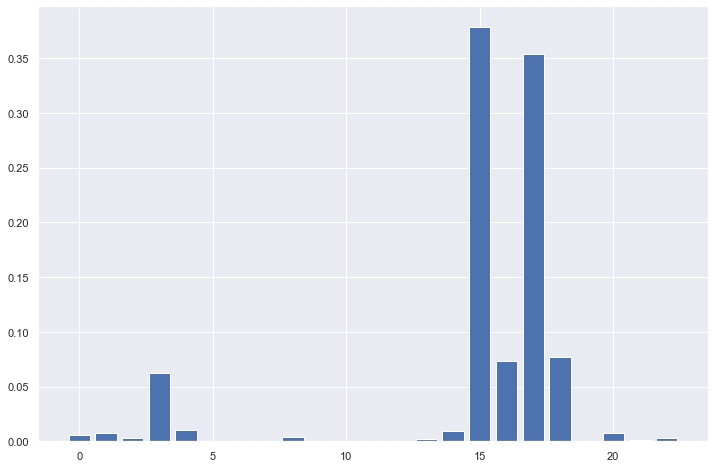

In [323]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

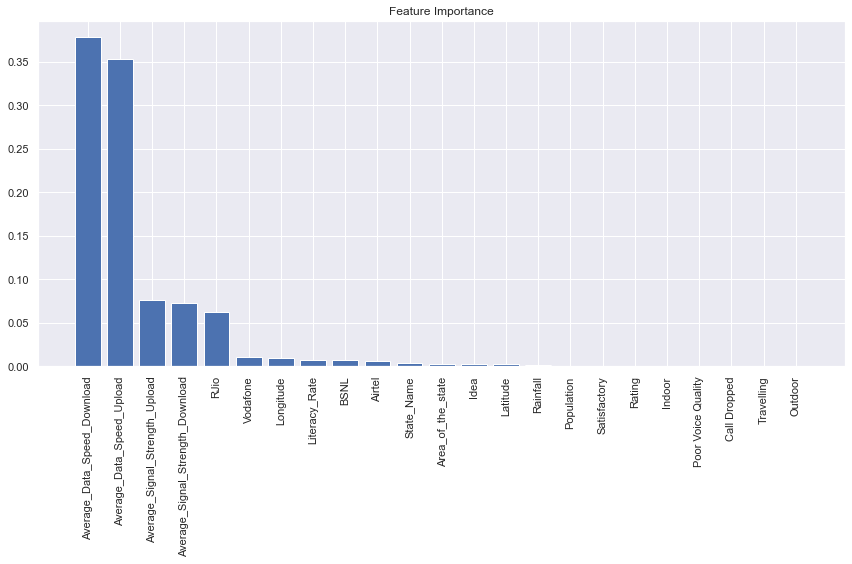

In [324]:
plt.title('Feature Importance')
plt.bar(range(X2_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X2_train.shape[1]), X2.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [325]:
results = permutation_importance(modelRF, X2_train, Y6_train,random_state=0)

In [326]:
importance1 = results.importances_mean
importance1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05522982, 0.        , 0.00144551, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [327]:
sorted_indices = np.argsort(importance1)[::-1]
print(sorted_indices)

[15 17 22  9  1  2  3  4  5  6  7  8 11 10 21 12 13 14 16 18 19 20  0]


In [328]:
importance1[sorted_indices]

array([0.05522982, 0.00144551, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [329]:
for i,v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.05523
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00145
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000


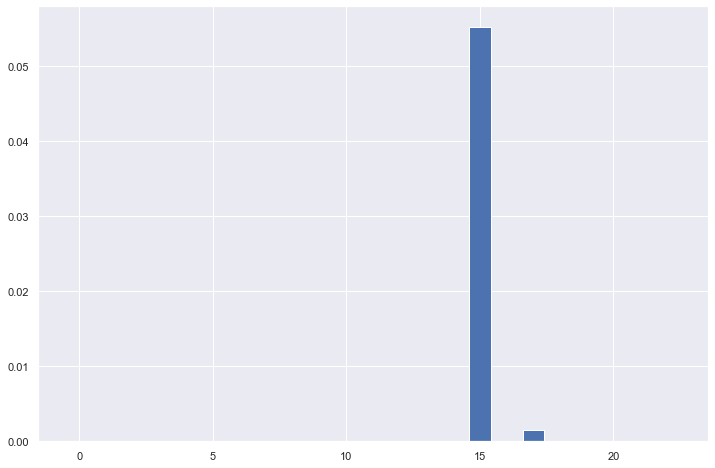

In [330]:
plt.bar([x for x in range(len(importance1))], importance1)
plt.show()

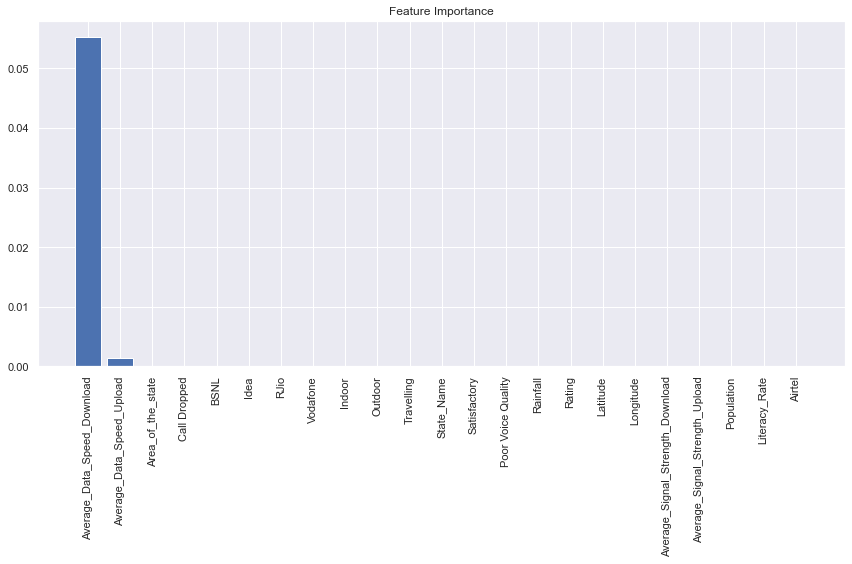

In [331]:
plt.title('Feature Importance')
plt.bar(range(X2_train.shape[1]), importance1[sorted_indices], align='center')
plt.xticks(range(X2_train.shape[1]), X2.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Clustering Analysis


In [332]:
Dataset.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [333]:
from sklearn.cluster import KMeans

In [334]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

How we are gonna proceed is first trying with scaled dataset, then will try with original dataset.

In [335]:
categorical_variables_df.shape

(30785, 6)

In [336]:
continuous_variables_df.shape

(30785, 10)

In [337]:
continuous_variables_df_scaled.shape

(30785, 10)

In [338]:
Operator_ohe.shape

(30785, 5)

In [339]:
InOutTravelling_ohe.shape

(30785, 3)

In [340]:
NetworkType_ohe.shape

(30785, 2)

In [341]:
statename_encoder.shape

(30785, 1)

In [342]:
Rating.shape

(30785, 1)

In [343]:
CallDropCategory_ohe.shape

(30785, 3)

In [344]:
cluster_data = pd.concat([Operator_ohe,InOutTravelling_ohe,NetworkType_ohe,statename_encoder,CallDropCategory_ohe,Rating,continuous_variables_df_scaled],axis=1)

In [345]:
cluster_data.shape

(30785, 25)

In [346]:
cluster_data.head()

,Airtel,BSNL,Idea,RJio,Vodafone,Indoor,Outdoor,Travelling,3G,4G,...,Latitude,Longitude,Average_Data_Speed_Download,Average_Signal_Strength_Download,Average_Data_Speed_Upload,Average_Signal_Strength_Upload,Population,Literacy_Rate,Rainfall,Area_of_the_state
0,1,0,0,0,0,1,0,0,0,1,...,-1.628683,0.009791,-0.474010,-0.015390,-0.666041,-0.933559,-0.784760,0.067972,0.055441,-0.322333
1,0,0,0,0,1,1,0,0,0,1,...,0.523471,-1.021803,-0.675554,-0.000104,0.362853,-0.554166,-0.801562,0.282449,-0.819964,-0.276838
2,1,0,0,0,0,1,0,0,1,0,...,-1.969411,-0.178606,-1.264447,0.036426,-1.468474,0.283877,-0.516893,0.467203,-0.484266,-0.985799
3,1,0,0,0,0,1,0,0,0,1,...,0.263613,-0.913738,-0.796570,0.013444,-0.703500,-0.241686,-0.801562,0.282449,-0.819964,-0.276838
4,1,0,0,0,0,0,0,1,0,1,...,-0.497557,-0.776993,-0.267152,-0.011121,0.509635,-0.838711,0.461249,0.628663,0.503398,0.923559


In [347]:
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(2,16),locate_elbow=True)

In [348]:
#visualizer.fit(cluster_data)
#kelbow_visualizer(kmeans, cluster_data, k=(2,10))

# Elbow method

In [349]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(cluster_data)
    SSE.append(kmeans.inertia_)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be r

Text(0, 0.5, 'Inertia')

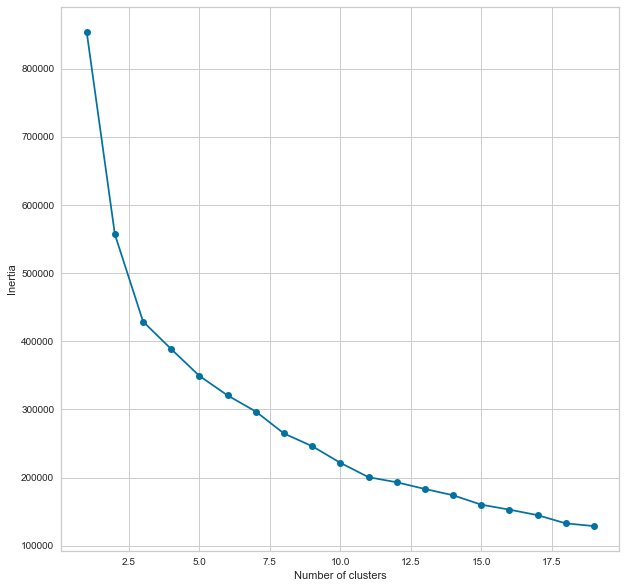

In [350]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(10,10))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

k can take value of 10 or 3, let's go with 10

In [351]:
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=False, verbose=0, random_state=0, copy_x=True, n_jobs=-1, algorithm='auto')


In [352]:
kmeans.fit(cluster_data)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=10, n_jobs=-1, precompute_distances=False, random_state=0)

In [353]:
kmeans.labels_

array([2, 2, 0, ..., 2, 6, 0])

In [354]:
pred = kmeans.fit_predict(cluster_data)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [355]:
pred

array([2, 2, 0, ..., 2, 6, 0])

In [356]:
kmeans.cluster_centers_

array([[ 6.13929889e-01, -1.04083409e-16,  2.30627306e-03,
         3.53782288e-01,  2.99815498e-02,  7.40313653e-01,
         1.46678967e-01,  1.13007380e-01,  2.67988930e-01,
         7.32011070e-01,  1.20000000e+01,  2.38929889e-01,
         1.33302583e-01,  6.27767528e-01,  3.50922509e+00,
        -1.78361391e+00,  3.12481800e-01, -4.27793418e-01,
         1.16509969e-02, -5.39207388e-01, -3.02020151e-01,
        -5.16893324e-01,  4.67203280e-01, -4.84265969e-01,
        -9.85798624e-01],
       [ 1.79516686e-01,  8.05523590e-03,  4.25776755e-02,
         7.69850403e-01, -4.99600361e-16,  4.57997699e-01,
         4.43037975e-01,  9.89643268e-02,  5.75373993e-02,
         9.42462601e-01,  6.90448792e-02,  3.79746835e-02,
         1.27733026e-01,  8.34292290e-01,  3.53049482e+00,
        -7.59325224e-01,  8.42563956e-01,  1.26532632e+00,
         3.78727059e-02,  6.76646464e-01,  3.72237308e-01,
        -3.04171037e-01, -5.06977594e+00,  2.83429798e-01,
        -7.22486762e-01],
    

In [357]:
frame1 = pd.DataFrame(pred, columns=['cluster'])
frame1 = frame1.astype('category')
frame1 = pd.concat([frame1,cluster_data],axis=1)

In [358]:
frame1.shape

(30785, 26)

In [359]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=False, verbose=0, random_state=0, copy_x=True, n_jobs=-1, algorithm='auto')

In [360]:
kmeans.fit(cluster_data)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1, precompute_distances=False, random_state=0)

In [361]:
pred = kmeans.labels_

In [362]:
pred

array([1, 1, 2, ..., 1, 0, 2])

In [363]:
centers = kmeans.cluster_centers_

In [364]:
centers

array([[ 2.04418194e-01,  3.58211245e-02,  1.10378154e-01,
         5.35629363e-01,  1.13753164e-01,  6.22229040e-01,
         1.71511851e-01,  2.06259109e-01,  2.03727851e-01,
         7.96272149e-01,  8.04448876e+00,  6.63496203e-02,
         1.75270384e-01,  7.58379995e-01,  3.62583416e+00,
        -3.18899853e-01, -3.88828727e-01,  1.58444027e-01,
         2.71962819e-02, -6.05423797e-03,  9.35625941e-02,
         1.78516601e-01,  4.82392549e-01,  4.74902953e-01,
         6.96181884e-01],
       [ 2.34205721e-01,  1.46074254e-03,  4.83262325e-02,
         5.39013999e-01,  1.76993305e-01,  6.66463786e-01,
         2.37492392e-01,  9.60438223e-02,  1.91722459e-01,
         8.08277541e-01,  3.15666464e+00,  1.26962873e-01,
         2.76810712e-01,  5.96226415e-01,  3.20365186e+00,
         6.17842773e-02, -2.03284783e-02,  6.40987603e-02,
         2.03732232e-02,  2.31777702e-01, -6.83310181e-02,
        -6.98917535e-01, -5.89512837e-01, -4.84759885e-01,
        -7.80971826e-01],
    

In [365]:
centers[0:1,0:1]

array([[0.20441819]])

In [366]:
frame2 = pd.DataFrame(pred, columns=['cluster'])
frame2 = frame2.astype('category')
frame2 = pd.concat([frame2,cluster_data],axis=1)

In [367]:
frame2.shape

(30785, 26)

# silhouette analysis

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b

S = (b – a)/m a x (a, b) 
The value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

In [368]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30785 entries, 0 to 30784
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Airtel                            30785 non-null  uint8   
 1   BSNL                              30785 non-null  uint8   
 2   Idea                              30785 non-null  uint8   
 3   RJio                              30785 non-null  uint8   
 4   Vodafone                          30785 non-null  uint8   
 5   Indoor                            30785 non-null  uint8   
 6   Outdoor                           30785 non-null  uint8   
 7   Travelling                        30785 non-null  uint8   
 8   3G                                30785 non-null  uint8   
 9   4G                                30785 non-null  uint8   
 10  State_Name                        30785 non-null  category
 11  Call Dropped                      30785 non-null  uint

In [369]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [370]:
from yellowbrick.cluster import SilhouetteVisualizer

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.wa

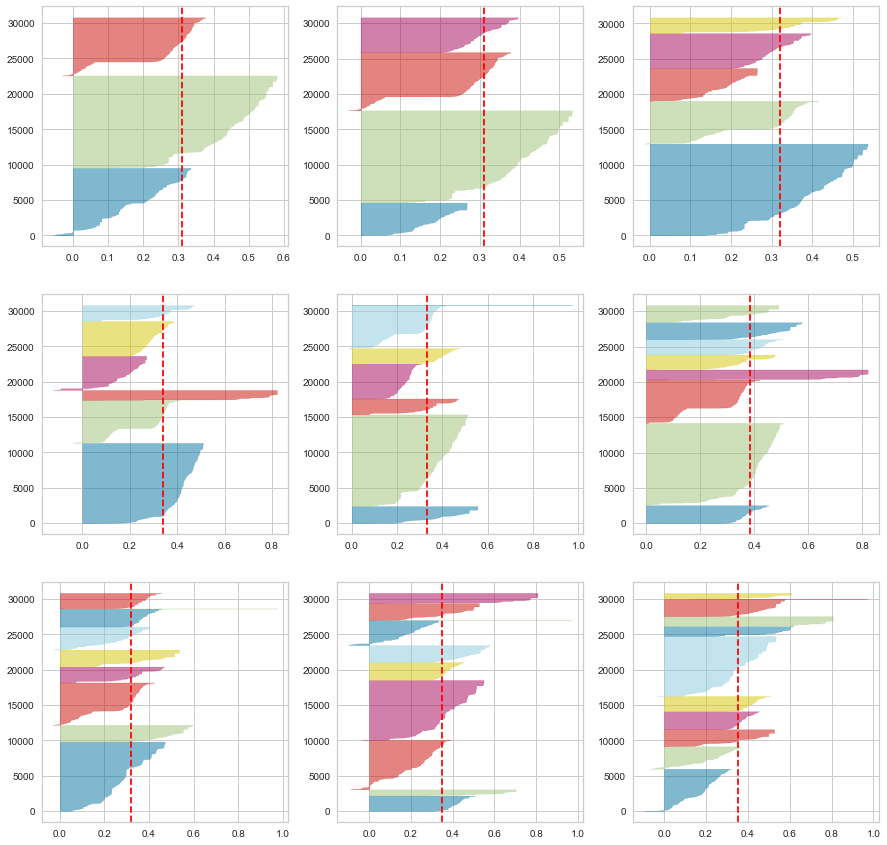

In [371]:
#for i,k in enumerate([2,3,4,5]):
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i in [3,4,5,6,7,8,9,10,11]:    
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=False, verbose=0, random_state=0, copy_x=True, n_jobs=-1, algorithm='auto')

    q, mod = divmod(i, 3)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(cluster_data)

till k = 10 we seen non-uniform thickness, but in k=11 thickness is fine but here bar-length (fluctuation) is not similar.

The silhouette score for each cluster is should above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. 

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.wa

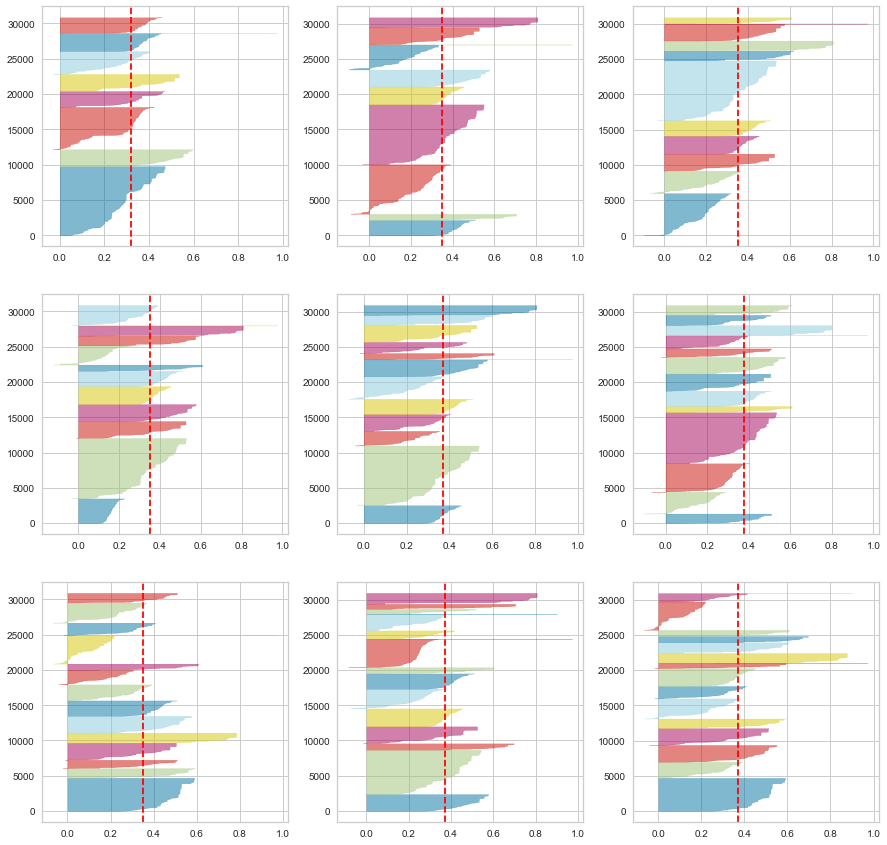

In [372]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i in [9,10,11,12,13,14,15,16,17]:    
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=False, verbose=0, random_state=0, copy_x=True, n_jobs=-1, algorithm='auto')

    q, mod = divmod(i, 3)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick',ax=ax[q-3][mod])
    visualizer.fit(cluster_data)

k=11, is optimal cause approx all clusters are having scores around average and fluctuation are also not that much. and the thickness also fine compares to other values of k.
I run again and now I'm getting k=15 optimal value.

In [373]:
kmeans = KMeans(n_clusters=11, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=False, verbose=0, random_state=0, copy_x=True, n_jobs=-1, algorithm='auto')

In [374]:
kmeans.fit(cluster_data)
pred = kmeans.labels_
centers = kmeans.cluster_centers_

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [375]:
silhouette_vals = silhouette_samples(cluster_data,pred)
silhouette_sco = silhouette_score(cluster_data, pred, metric='euclidean')

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [376]:
pred

array([0, 0, 4, ..., 0, 1, 4])

In [377]:
centers

array([[ 2.58415676e-01,  8.37380673e-04,  5.96215039e-02,
         4.37615140e-01,  2.43510300e-01,  6.87824485e-01,
         2.13364596e-01,  9.88109194e-02,  2.54731201e-01,
         7.45268799e-01,  3.87238319e+00,  1.32138670e-01,
         2.88058952e-01,  5.79802378e-01,  3.11304639e+00,
        -2.34783215e-02, -5.04570676e-01, -4.38204521e-01,
         1.57768530e-02, -2.82549674e-02, -1.85217253e-01,
        -9.77196629e-01,  1.61956653e-01, -6.35449939e-01,
        -6.53471995e-01],
       [ 3.32177750e-01,  4.66435550e-02,  2.11786952e-01,
         2.83328081e-01,  1.26063662e-01,  5.73904822e-01,
         1.52537031e-01,  2.73558147e-01,  4.05924992e-01,
         5.94075008e-01,  7.84115979e+00,  2.54648598e-01,
         6.72549638e-01,  7.28017649e-02,  1.57548062e+00,
        -3.14096657e-01, -6.15172780e-01, -4.26854351e-01,
         2.10183909e-02, -4.37355323e-01, -6.84804422e-02,
         2.85253319e-01,  5.30965285e-01,  4.71688138e-01,
         8.41541018e-01],
    

In [378]:
silhouette_vals

array([0.1310654 , 0.241901  , 0.35701366, ..., 0.02778153, 0.31619789,
       0.47648267])

In [379]:
silhouette_sco

0.35436650863985425

silhouette_score is around 0.33, which represents that there is a overlapping between clusters with samples very close to the decision boundary.

In [380]:
clustered_data = pd.DataFrame(pred, columns=['cluster'])

In [381]:
clustered_data.dtypes

cluster    int32
dtype: object

In [382]:
clustered_data = clustered_data.astype('category')

In [383]:
clustered_data.dtypes

cluster    category
dtype: object

In [384]:
clustered_data = pd.concat([clustered_data,cluster_data],axis=1)

In [385]:
clustered_data.head()

,cluster,Airtel,BSNL,Idea,RJio,Vodafone,Indoor,Outdoor,Travelling,3G,...,Latitude,Longitude,Average_Data_Speed_Download,Average_Signal_Strength_Download,Average_Data_Speed_Upload,Average_Signal_Strength_Upload,Population,Literacy_Rate,Rainfall,Area_of_the_state
0,0,1,0,0,0,0,1,0,0,0,...,-1.628683,0.009791,-0.474010,-0.015390,-0.666041,-0.933559,-0.784760,0.067972,0.055441,-0.322333
1,0,0,0,0,0,1,1,0,0,0,...,0.523471,-1.021803,-0.675554,-0.000104,0.362853,-0.554166,-0.801562,0.282449,-0.819964,-0.276838
2,4,1,0,0,0,0,1,0,0,1,...,-1.969411,-0.178606,-1.264447,0.036426,-1.468474,0.283877,-0.516893,0.467203,-0.484266,-0.985799
3,0,1,0,0,0,0,1,0,0,0,...,0.263613,-0.913738,-0.796570,0.013444,-0.703500,-0.241686,-0.801562,0.282449,-0.819964,-0.276838
4,5,1,0,0,0,0,0,0,1,0,...,-0.497557,-0.776993,-0.267152,-0.011121,0.509635,-0.838711,0.461249,0.628663,0.503398,0.923559


In [386]:
clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30785 entries, 0 to 30784
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   cluster                           30785 non-null  category
 1   Airtel                            30785 non-null  uint8   
 2   BSNL                              30785 non-null  uint8   
 3   Idea                              30785 non-null  uint8   
 4   RJio                              30785 non-null  uint8   
 5   Vodafone                          30785 non-null  uint8   
 6   Indoor                            30785 non-null  uint8   
 7   Outdoor                           30785 non-null  uint8   
 8   Travelling                        30785 non-null  uint8   
 9   3G                                30785 non-null  uint8   
 10  4G                                30785 non-null  uint8   
 11  State_Name                        30785 non-null  cate